In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [451]:
pd.reset_option('all')

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [452]:
import os
os.chdir('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony')

current_working_directory = os.getcwd()
print("Current Working Directory:", current_working_directory)


Current Working Directory: /Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony


In [453]:
df_index=pd.read_csv('./Rui_final_notebooks/df_ready_for_index.csv')

In [454]:
# Convert 'Date' column to datetime
df_index['Date'] = pd.to_datetime(df_index['Date'], errors='coerce')

In [455]:
print(df_index.dtypes)

Unnamed: 0                  int64
Date               datetime64[ns]
Statement                  object
Name_of_Speaker            object
Sentiment                 float64
Position                   object
dtype: object


In [456]:
df_index

Unnamed: 0       Date  \
0               0 2022-09-30   
1               1 2022-09-30   
2               2 2022-09-30   
3               3 2022-09-30   
4               4 2022-09-30   
...           ...        ...   
30163       30163 2023-02-02   
30164       30164 2022-12-15   
30165       30165 2022-10-27   
30166       30166 2022-09-08   
30167       30167 2022-07-21   

                                               Statement  \
0      At a conference in Florence, Banca d'Italia Go...   
1      Banca d'Italia Governor  Ignazio Visco  on Fri...   
2      ECB  Executive Board Member  Isabel Schnabel  ...   
3      In a speech organised by the Florence School o...   
4      According to first estimates, euro area inflat...   
...                                                  ...   
30163  The Governing Council will stay the course in ...   
30164  The Governing Council today decided to raise t...   
30165  The Governing Council today decided to raise t...   
30166  The Governing Council today decided to raise t...   
30167  Today, in line with the Governing Council's st...   

              Name_of_Speaker  Sentiment                   Position  
0               Mario Centeno       -1.0                   Governor  
1               Ignazio Visco       -1.0                   Governor  
2             Isabel Schnabel        1.0          Executive Council  
3               Ignazio Visco        1.0                   Governor  
4           Christine Lagarde        1.0          Executive Council  
...                       ...        ...                        ...  
30163  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30164  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30165  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30166  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30167  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  

[30168 rows x 6 columns]

In [457]:
df_index.reset_index(drop=True, inplace=True)

In [458]:
df_index.drop(columns=['Unnamed: 0'], inplace=True)

In [459]:
df_index

Date                                          Statement  \
0     2022-09-30  At a conference in Florence, Banca d'Italia Go...   
1     2022-09-30  Banca d'Italia Governor  Ignazio Visco  on Fri...   
2     2022-09-30  ECB  Executive Board Member  Isabel Schnabel  ...   
3     2022-09-30  In a speech organised by the Florence School o...   
4     2022-09-30  According to first estimates, euro area inflat...   
...          ...                                                ...   
30163 2023-02-02  The Governing Council will stay the course in ...   
30164 2022-12-15  The Governing Council today decided to raise t...   
30165 2022-10-27  The Governing Council today decided to raise t...   
30166 2022-09-08  The Governing Council today decided to raise t...   
30167 2022-07-21  Today, in line with the Governing Council's st...   

              Name_of_Speaker  Sentiment                   Position  
0               Mario Centeno       -1.0                   Governor  
1               Ignazio Visco       -1.0                   Governor  
2             Isabel Schnabel        1.0          Executive Council  
3               Ignazio Visco        1.0                   Governor  
4           Christine Lagarde        1.0          Executive Council  
...                       ...        ...                        ...  
30163  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30164  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30165  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30166  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  
30167  ECB_MONETARY_STATEMENT        1.0  Monetary Policy Statement  

[30168 rows x 5 columns]

# Aggregrating per ecb policy statement

In [460]:
filtered_df = df_index[df_index['Position'] == 'Monetary Policy Statement']
filtered_df


Date                                          Statement  \
30154 2024-03-07  The Governing Council today decided to keep th...   
30155 2024-01-25  The Governing Council today decided to keep th...   
30156 2023-12-14  The Governing Council today decided to keep th...   
30157 2023-10-26  The Governing Council today decided to keep th...   
30158 2023-09-14  Inflation continues to decline but is still ex...   
30159 2023-07-27  Inflation continues to decline but is still ex...   
30160 2023-06-15  Inflation has been coming down but is projecte...   
30161 2023-05-04  The inflation outlook continues to be too high...   
30162 2023-03-16  Inflation is projected to remain too high for ...   
30163 2023-02-02  The Governing Council will stay the course in ...   
30164 2022-12-15  The Governing Council today decided to raise t...   
30165 2022-10-27  The Governing Council today decided to raise t...   
30166 2022-09-08  The Governing Council today decided to raise t...   
30167 2022-07-21  Today, in line with the Governing Council's st...   

              Name_of_Speaker  Sentiment                   Position  
30154  ECB_MONETARY_STATEMENT   0.000000  Monetary Policy Statement  
30155  ECB_MONETARY_STATEMENT   0.666667  Monetary Policy Statement  
30156  ECB_MONETARY_STATEMENT   0.333333  Monetary Policy Statement  
30157  ECB_MONETARY_STATEMENT   0.666667  Monetary Policy Statement  
30158  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30159  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30160  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30161  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30162  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30163  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30164  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30165  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30166  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement  
30167  ECB_MONETARY_STATEMENT   1.000000  Monetary Policy Statement

In [461]:
# Given dates
dates = [
 '2023-12-14','2023-10-26', '2023-09-14', 
    '2023-07-27', '2023-06-15', '2023-05-04', '2023-03-16', '2023-02-02', 
    '2022-12-15', '2022-10-27', '2022-09-08', '2022-07-21'
]
date_df = pd.DataFrame({'Date': pd.to_datetime(dates)})

# Filter the DataFrame to only include data up to December 2023
df_index = df_index[df_index['Position'] != 'Monetary Policy Statement']


In [462]:
# Function to find the period for each date in df_index
def find_period(date, periods):
    for i in range(len(periods) - 1):
        if periods[i] <= date < periods[i + 1]:
            return periods[i]
    return periods.iloc[-1]  # Use iloc to access the last element

# Sort periods to ensure correct interval assignment
periods = date_df['Date'].sort_values().reset_index(drop=True)

# Add a period column to the main DataFrame
df_index['Period'] = df_index['Date'].apply(lambda x: find_period(x, periods))

df_index

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/4028532825.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['Period'] = df_index['Date'].apply(lambda x: find_period(x, periods))


Date                                          Statement  \
0     2022-09-30  At a conference in Florence, Banca d'Italia Go...   
1     2022-09-30  Banca d'Italia Governor  Ignazio Visco  on Fri...   
2     2022-09-30  ECB  Executive Board Member  Isabel Schnabel  ...   
3     2022-09-30  In a speech organised by the Florence School o...   
4     2022-09-30  According to first estimates, euro area inflat...   
...          ...                                                ...   
30149 2024-01-02  Banco de España Governor  Pablo Hernández de C...   
30150 2024-01-02  Both fixed and variable rate mortgages are exp...   
30151 2024-01-02  Despite facing an extraordinary tax and increa...   
30152 2024-01-02  Banco de España Governor  Pablo Hernández de C...   
30153 2024-01-01  The year 2023 was the year with the largest nu...   

              Name_of_Speaker  Sentiment           Position     Period  
0               Mario Centeno       -1.0           Governor 2022-09-08  
1               Ignazio Visco       -1.0           Governor 2022-09-08  
2             Isabel Schnabel        1.0  Executive Council 2022-09-08  
3               Ignazio Visco        1.0           Governor 2022-09-08  
4           Christine Lagarde        1.0  Executive Council 2022-09-08  
...                       ...        ...                ...        ...  
30149       Christine Lagarde        1.0  Executive Council 2023-12-14  
30150       Christine Lagarde       -1.0  Executive Council 2023-12-14  
30151       Christine Lagarde        1.0  Executive Council 2023-12-14  
30152  Pablo Hernandez de Cos        1.0           Governor 2023-12-14  
30153       Christine Lagarde       -1.0  Executive Council 2023-12-14  

[30154 rows x 6 columns]

In [463]:
# Group by 'Date' and 'Name_of_Speaker', and count the occurrences
speaker_counts = df_index.groupby(['Period', 'Name_of_Speaker']).size().reset_index(name='Counts')

# To display the result
print(speaker_counts)

        Period              Name_of_Speaker  Counts
0   2022-07-21                Bostjan Vasle       1
1   2022-07-21            Christine Lagarde     239
2   2022-07-21                Fabio Panetta      13
3   2022-07-21  Francois Villeroy de Galhau      11
4   2022-07-21             Gabriel Makhlouf       1
..         ...                          ...     ...
292 2023-12-14                  Philip Lane      33
293 2023-12-14              Piero Cipollone      17
294 2023-12-14                Pierre Wunsch      34
295 2023-12-14              Robert Holzmann      32
296 2023-12-14            Yannis Stournaras      29

[297 rows x 3 columns]


In [464]:
import pandas as pd

# Assuming df_index is your DataFrame
# Load your data into df_index, for example by reading from a CSV
# df_index = pd.read_csv('path_to_your_file.csv')

# Step 1: Group by 'Period' and 'Name_of_Speaker', and count the occurrences
speaker_counts = df_index.groupby(['Period', 'Name_of_Speaker']).size().reset_index(name='Counts')

# Step 2: Create a DataFrame with all combinations of 'Period' and 'Name_of_Speaker'
all_periods = pd.DataFrame(df_index['Period'].unique(), columns=['Period'])
all_speakers = pd.DataFrame(df_index['Name_of_Speaker'].unique(), columns=['Name_of_Speaker'])
all_combinations = all_periods.assign(key=1).merge(all_speakers.assign(key=1), on='key').drop('key', axis=1)

# Step 3: Merge and set counts of missing records to zero
full_data = all_combinations.merge(speaker_counts, on=['Period', 'Name_of_Speaker'], how='left')
full_data['Counts'] = full_data['Counts'].fillna(0)  # Set NaN counts to 0


# Filter to find records where counts are less than 5
few_records = full_data[full_data['Counts'] < 5]

# Display results: speakers and periods with counts under 5
print("Speakers and Periods with Counts Under 5:")
print(few_records[['Period', 'Name_of_Speaker']])




Speakers and Periods with Counts Under 5:
        Period  Name_of_Speaker
13  2022-09-08     Madis Muller
15  2022-09-08    Peter Kazimir
18  2022-09-08  Piero Cipollone
22  2022-09-08  Edward Scicluna
25  2022-09-08     Boris Vujcic
..         ...              ...
304 2023-10-26        Olli Rehn
310 2023-10-26     Madis Muller
319 2023-10-26  Edward Scicluna
322 2023-10-26     Boris Vujcic
323 2023-10-26  Gaston Reinesch

[69 rows x 2 columns]


In [465]:
# Count the number of times each speaker appears with counts under 5
speaker_few_count_frequency = few_records.groupby('Name_of_Speaker').size()

# Print the number of times each speaker appears with counts under 5
print("\nFrequency of Speakers with Counts Under 5:")
print(speaker_few_count_frequency)


Frequency of Speakers with Counts Under 5:
Name_of_Speaker
Boris Vujcic               6
Bostjan Vasle              5
Constantinos Herodotou     5
Edward Scicluna           12
Frank Elderson             2
Gabriel Makhlouf           4
Gaston Reinesch           12
Gediminas Simkus           1
Klaas Knot                 1
Madis Muller               6
Olli Rehn                  4
Pablo Hernandez de Cos     1
Peter Kazimir              3
Piero Cipollone            6
Pierre Wunsch              1
dtype: int64


In [466]:
import pandas as pd

# Assuming df_index is your DataFrame
# Load your data into df_index, for example by reading from a CSV
# df_index = pd.read_csv('path_to_your_file.csv')

# Calculate mean sentiment per period for each speaker
speaker_result = df_index.groupby(['Period', 'Name_of_Speaker'])['Sentiment'].mean().reset_index()

# Filter out the specific period of 2023-12-14
speaker_result = speaker_result[speaker_result['Period'] != '2023-12-14']

# Display the result
speaker_result



Period              Name_of_Speaker  Sentiment
0   2022-07-21                Bostjan Vasle   1.000000
1   2022-07-21            Christine Lagarde   0.828452
2   2022-07-21                Fabio Panetta  -0.384615
3   2022-07-21  Francois Villeroy de Galhau   1.000000
4   2022-07-21             Gabriel Makhlouf   1.000000
..         ...                          ...        ...
267 2023-10-26                  Philip Lane   0.543860
268 2023-10-26              Piero Cipollone   0.452381
269 2023-10-26                Pierre Wunsch   0.641026
270 2023-10-26              Robert Holzmann   0.674419
271 2023-10-26            Yannis Stournaras   0.240000

[272 rows x 3 columns]

In [467]:
combined_result=pd.DataFrame(speaker_result)

combined_result

Period              Name_of_Speaker  Sentiment
0   2022-07-21                Bostjan Vasle   1.000000
1   2022-07-21            Christine Lagarde   0.828452
2   2022-07-21                Fabio Panetta  -0.384615
3   2022-07-21  Francois Villeroy de Galhau   1.000000
4   2022-07-21             Gabriel Makhlouf   1.000000
..         ...                          ...        ...
267 2023-10-26                  Philip Lane   0.543860
268 2023-10-26              Piero Cipollone   0.452381
269 2023-10-26                Pierre Wunsch   0.641026
270 2023-10-26              Robert Holzmann   0.674419
271 2023-10-26            Yannis Stournaras   0.240000

[272 rows x 3 columns]

### Verify Data

In [468]:
# Get unique names of speakers
speaker_result = combined_result['Name_of_Speaker'].unique()

# Convert to DataFrame
unique_speakers_df = pd.DataFrame(combined_result, columns=['Name_of_Speaker'])
unique_speakers_df

Name_of_Speaker
0                  Bostjan Vasle
1              Christine Lagarde
2                  Fabio Panetta
3    Francois Villeroy de Galhau
4               Gabriel Makhlouf
..                           ...
267                  Philip Lane
268              Piero Cipollone
269                Pierre Wunsch
270              Robert Holzmann
271            Yannis Stournaras

[272 rows x 1 columns]

In [469]:
df_governors = pd.read_csv(r"./ECB Governors Analysis/ecb_governing_council.csv")

# Overwrite the 'Position' column with 'Executive Role' values where 'Executive Role' is populated
df_governors['Position'] = df_governors['Executive Role'].combine_first(df_governors['Position'])

# Select only the columns 'Full Name', 'Country', and 'Position'
df_governors = df_governors[['Full Name', 'Country', 'Position']]

df_governors

Full Name              Country  \
0             Christine Lagarde               France   
1               Luis de Guindos                Spain   
2               Piero Cipollone                Italy   
3                   Philip Lane  Republic of Ireland   
4                Frank Elderson          Netherlands   
5               Isabel Schnabel              Germany   
6        Pablo Hernandez de Cos                Spain   
7                 Joachim Nagel              Germany   
8                 Pierre Wunsch              Belgium   
9             Yannis Stournaras               Greece   
10                 Boris Vujcic              Croatia   
11              Gaston Reinesch           Luxembourg   
12  Francois Villeroy de Galhau               France   
13              Robert Holzmann              Austria   
14                Peter Kazimir             Slovakia   
15             Gediminas Simkus            Lithuania   
16                    Olli Rehn              Finland   
17                Mario Centeno             Portugal   
18              Edward Scicluna                Malta   
19                Bostjan Vasle             Slovenia   
20                 Madis Muller              Estonia   
21               Martins Kazaks               Latvia   
22                   Klaas Knot          Netherlands   
23       Constantinos Herodotou               Cyprus   
24             Gabriel Makhlouf  Republic of Ireland   
25                Fabio Panetta                Italy   
26                Ignazio Visco                Italy   

                                             Position  
0                                           President  
1                                      Vice President  
2                       Member of the Executive Board  
3     Member of the Executive Board & Chief Economist  
4   Member of the Executive Board; Vice-chair of t...  
5                       Member of the Executive Board  
6                                   National Governor  
7                                   National Governor  
8                                   National Governor  
9                                   National Governor  
10                                  National Governor  
11                                  National Governor  
12                                  National Governor  
13                                  National Governor  
14                                  National Governor  
15                                  National Governor  
16                                  National Governor  
17                                  National Governor  
18                                  National Governor  
19                                  National Governor  
20                                  National Governor  
21                                  National Governor  
22                                  National Governor  
23                                  National Governor  
24                                  National Governor  
25                                  National Governor  
26                                  National Governor

In [470]:
# Merge the two dataframes on the speaker names to see if all match
merged_df = pd.merge(unique_speakers_df, df_governors, left_on='Name_of_Speaker', right_on='Full Name', how='outer', indicator=True)

# Display mismatches
mismatches = merged_df[merged_df['_merge'] != 'both']

# Check if there are any mismatches
if mismatches.empty:
    print("All speakers in unique_speakers_df match with df_governors.")
else:
    print("There are mismatches between unique_speakers_df and df_governors:")
    print(mismatches[['Name_of_Speaker', 'Full Name', '_merge']])


All speakers in unique_speakers_df match with df_governors.


In [471]:
# Check vice-versa: Ensure all entries in df_governors are in unique_speakers_df
reverse_merged_df = pd.merge(df_governors, unique_speakers_df, left_on='Full Name', right_on='Name_of_Speaker', how='outer', indicator=True)

# Display reverse mismatches
reverse_mismatches = reverse_merged_df[reverse_merged_df['_merge'] != 'both']

# Check if there are any reverse mismatches
if reverse_mismatches.empty:
    print("All entries in df_governors match with unique_speakers_df and vice-versa.")
else:
    print("There are reverse mismatches between df_governors and unique_speakers_df:")
    print(reverse_mismatches[['Full Name', 'Name_of_Speaker', '_merge']])

All entries in df_governors match with unique_speakers_df and vice-versa.


## Taking care of Panettaa

In [472]:
combined_result

Period              Name_of_Speaker  Sentiment
0   2022-07-21                Bostjan Vasle   1.000000
1   2022-07-21            Christine Lagarde   0.828452
2   2022-07-21                Fabio Panetta  -0.384615
3   2022-07-21  Francois Villeroy de Galhau   1.000000
4   2022-07-21             Gabriel Makhlouf   1.000000
..         ...                          ...        ...
267 2023-10-26                  Philip Lane   0.543860
268 2023-10-26              Piero Cipollone   0.452381
269 2023-10-26                Pierre Wunsch   0.641026
270 2023-10-26              Robert Holzmann   0.674419
271 2023-10-26            Yannis Stournaras   0.240000

[272 rows x 3 columns]

In [473]:
# Check if 'Fabio Panetta' is present in the 'Name_of_Speaker' column
fabio_panetta_rows = combined_result[combined_result['Name_of_Speaker'] == 'Fabio Panetta']

# Display the rows with 'Fabio Panetta'
print(fabio_panetta_rows)

        Period Name_of_Speaker  Sentiment
2   2022-07-21   Fabio Panetta  -0.384615
25  2022-09-08   Fabio Panetta   0.852632
51  2022-10-27   Fabio Panetta   0.225352
75  2022-12-15   Fabio Panetta   0.695652
99  2023-02-02   Fabio Panetta   0.315789
124 2023-03-16   Fabio Panetta   0.771930
149 2023-05-04   Fabio Panetta   0.506849
175 2023-06-15   Fabio Panetta   0.715278
200 2023-07-27   Fabio Panetta   0.431373
225 2023-09-14   Fabio Panetta   0.851064
251 2023-10-26   Fabio Panetta   0.307692


In [474]:

# Function to apply the changes based on conditions
def modify_speaker(row):
    if row['Name_of_Speaker'] == 'Fabio Panetta':
        # Before November 2023
        if row['Period'] < pd.to_datetime('2023-10-31'):
            row['Country'] = 'Fabio Panetta'
        # During November and December 2023
        elif row['Period'] >= pd.to_datetime('2023-11-01'):
            row['Name_of_Speaker'] = 'Fabio Panetta_IT'
            row['Country'] = 'Italy'
    return row

# Apply modifications to the DataFrame
combined_result = combined_result.apply(modify_speaker, axis=1)

# Explicitly set Country for 'Fabio Panetta' before 2023-11
combined_result.loc[(combined_result['Name_of_Speaker'] == 'Fabio Panetta') & (combined_result['Period'] < pd.to_datetime('2023-11-01')), 'Country'] = 'Fabio Panetta'


In [475]:
# Check if 'Fabio Panetta' is present in the 'Name_of_Speaker' column
fabio_panetta_rows = combined_result[combined_result['Name_of_Speaker'] == 'Fabio Panetta']

# Display the rows with 'Fabio Panetta'
print(fabio_panetta_rows)

           Country Name_of_Speaker     Period  Sentiment
2    Fabio Panetta   Fabio Panetta 2022-07-21  -0.384615
25   Fabio Panetta   Fabio Panetta 2022-09-08   0.852632
51   Fabio Panetta   Fabio Panetta 2022-10-27   0.225352
75   Fabio Panetta   Fabio Panetta 2022-12-15   0.695652
99   Fabio Panetta   Fabio Panetta 2023-02-02   0.315789
124  Fabio Panetta   Fabio Panetta 2023-03-16   0.771930
149  Fabio Panetta   Fabio Panetta 2023-05-04   0.506849
175  Fabio Panetta   Fabio Panetta 2023-06-15   0.715278
200  Fabio Panetta   Fabio Panetta 2023-07-27   0.431373
225  Fabio Panetta   Fabio Panetta 2023-09-14   0.851064
251  Fabio Panetta   Fabio Panetta 2023-10-26   0.307692


In [476]:
# Display rows where changes are related to Fabio Panetta
filtered_rows = combined_result[combined_result['Name_of_Speaker'].str.contains('Fabio Panetta_IT')]
print(filtered_rows)


Empty DataFrame
Columns: [Country, Name_of_Speaker, Period, Sentiment]
Index: []


In [477]:
combined_result = combined_result[~((combined_result['Name_of_Speaker'] == 'Ignazio Visco') & (combined_result['Period'] > pd.to_datetime('2023-11-01')))]

# Check if 'Fabio Panetta' is present in the 'Name_of_Speaker' column
fabio_panetta_rows = combined_result[combined_result['Name_of_Speaker'] == 'Ignazio Visco']

# Display the rows with 'Fabio Panetta'
print(fabio_panetta_rows)

    Country Name_of_Speaker     Period  Sentiment
6       NaN   Ignazio Visco 2022-07-21   0.400000
31      NaN   Ignazio Visco 2022-09-08   0.282051
56      NaN   Ignazio Visco 2022-10-27   0.446429
80      NaN   Ignazio Visco 2022-12-15   0.222222
104     NaN   Ignazio Visco 2023-02-02   0.362637
129     NaN   Ignazio Visco 2023-03-16   0.543210
155     NaN   Ignazio Visco 2023-05-04   0.406250
180     NaN   Ignazio Visco 2023-06-15   0.097222
204     NaN   Ignazio Visco 2023-07-27   0.000000
230     NaN   Ignazio Visco 2023-09-14   0.341463
256     NaN   Ignazio Visco 2023-10-26   0.857143


In [478]:
combined_result = combined_result[~((combined_result['Name_of_Speaker'] == 'Piero Cipollone') & (combined_result['Period'] < pd.to_datetime('2023-11-01')))]

In [479]:
# Check if 'Fabio Panetta' is present in the 'Name_of_Speaker' column
fabio_panetta_rows = combined_result[combined_result['Name_of_Speaker'] == 'Piero Cipollone']

# Display the rows with 'Fabio Panetta'
print(fabio_panetta_rows)

Empty DataFrame
Columns: [Country, Name_of_Speaker, Period, Sentiment]
Index: []


### Now all matched, EDA On Aggregated Speaker

In [480]:
# Summary statistics
summary_stats = combined_result.describe()
summary_stats

Period   Sentiment
count                            265  265.000000
mean   2023-03-17 07:03:50.943396352    0.642215
min              2022-07-21 00:00:00   -0.384615
25%              2022-10-27 00:00:00    0.449438
50%              2023-03-16 00:00:00    0.702970
75%              2023-07-27 00:00:00    0.866667
max              2023-10-26 00:00:00    1.000000
std                              NaN    0.312115

In [481]:
dict_ECB = {
    'Pablo Hernandez de Cos': 'Spain',
    'Joachim Nagel': 'Germany',
    'Pierre Wunsch': 'Belgium',
    'Yannis Stournaras': 'Greece',
    'Boris Vujcic': 'Croatia',
    'Gaston Reinesch': 'Luxembourg',
    'Francois Villeroy de Galhau': 'France',
    'Robert Holzmann': 'Austria',
    'Peter Kazimir': 'Slovakia',
    'Gediminas Simkus': 'Lithuania',
    'Olli Rehn': 'Finland',
    'Mario Centeno': 'Portugal',
    'Edward Scicluna': 'Malta',
    'Bostjan Vasle': 'Slovenia',
    'Madis Muller': 'Estonia',
    'Martins Kazaks': 'Latvia',
    'Klaas Knot': 'Netherlands',
    'Constantinos Herodotou': 'Cyprus',
    'Gabriel Makhlouf': 'Republic of Ireland',
    'Fabio Panetta_IT': 'Italy',
    'Ignazio Visco': 'Italy'
}


In [482]:
# Function to update 'Country' based on the 'Name_of_Speaker' using the dictionary
def update_country(row):
    name = row['Name_of_Speaker']
    if name in dict_ECB:
        row['Country'] = dict_ECB[name]
    return row

# Apply the function to the DataFrame
combined_result = combined_result.apply(update_country, axis=1)

In [483]:
combined_result

Country              Name_of_Speaker     Period  Sentiment
0               Slovenia                Bostjan Vasle 2022-07-21   1.000000
1                    NaN            Christine Lagarde 2022-07-21   0.828452
2          Fabio Panetta                Fabio Panetta 2022-07-21  -0.384615
3                 France  Francois Villeroy de Galhau 2022-07-21   1.000000
4    Republic of Ireland             Gabriel Makhlouf 2022-07-21   1.000000
..                   ...                          ...        ...        ...
266             Slovakia                Peter Kazimir 2023-10-26   0.285714
267                  NaN                  Philip Lane 2023-10-26   0.543860
269              Belgium                Pierre Wunsch 2023-10-26   0.641026
270              Austria              Robert Holzmann 2023-10-26   0.674419
271               Greece            Yannis Stournaras 2023-10-26   0.240000

[265 rows x 4 columns]

In [484]:
# Check if 'Fabio Panetta' is present in the 'Name_of_Speaker' column
fabio_panetta_rows = combined_result[combined_result['Name_of_Speaker'] == 'Fabio Panetta']

# Display the rows with 'Fabio Panetta'
print(fabio_panetta_rows)

           Country Name_of_Speaker     Period  Sentiment
2    Fabio Panetta   Fabio Panetta 2022-07-21  -0.384615
25   Fabio Panetta   Fabio Panetta 2022-09-08   0.852632
51   Fabio Panetta   Fabio Panetta 2022-10-27   0.225352
75   Fabio Panetta   Fabio Panetta 2022-12-15   0.695652
99   Fabio Panetta   Fabio Panetta 2023-02-02   0.315789
124  Fabio Panetta   Fabio Panetta 2023-03-16   0.771930
149  Fabio Panetta   Fabio Panetta 2023-05-04   0.506849
175  Fabio Panetta   Fabio Panetta 2023-06-15   0.715278
200  Fabio Panetta   Fabio Panetta 2023-07-27   0.431373
225  Fabio Panetta   Fabio Panetta 2023-09-14   0.851064
251  Fabio Panetta   Fabio Panetta 2023-10-26   0.307692


In [485]:
# Fill NaN values in the 'Country' column with the corresponding 'Name_of_Speaker'
combined_result['Country'] = combined_result['Country'].fillna(combined_result['Name_of_Speaker'])

In [486]:
combined_result

Country              Name_of_Speaker     Period  Sentiment
0               Slovenia                Bostjan Vasle 2022-07-21   1.000000
1      Christine Lagarde            Christine Lagarde 2022-07-21   0.828452
2          Fabio Panetta                Fabio Panetta 2022-07-21  -0.384615
3                 France  Francois Villeroy de Galhau 2022-07-21   1.000000
4    Republic of Ireland             Gabriel Makhlouf 2022-07-21   1.000000
..                   ...                          ...        ...        ...
266             Slovakia                Peter Kazimir 2023-10-26   0.285714
267          Philip Lane                  Philip Lane 2023-10-26   0.543860
269              Belgium                Pierre Wunsch 2023-10-26   0.641026
270              Austria              Robert Holzmann 2023-10-26   0.674419
271               Greece            Yannis Stournaras 2023-10-26   0.240000

[265 rows x 4 columns]

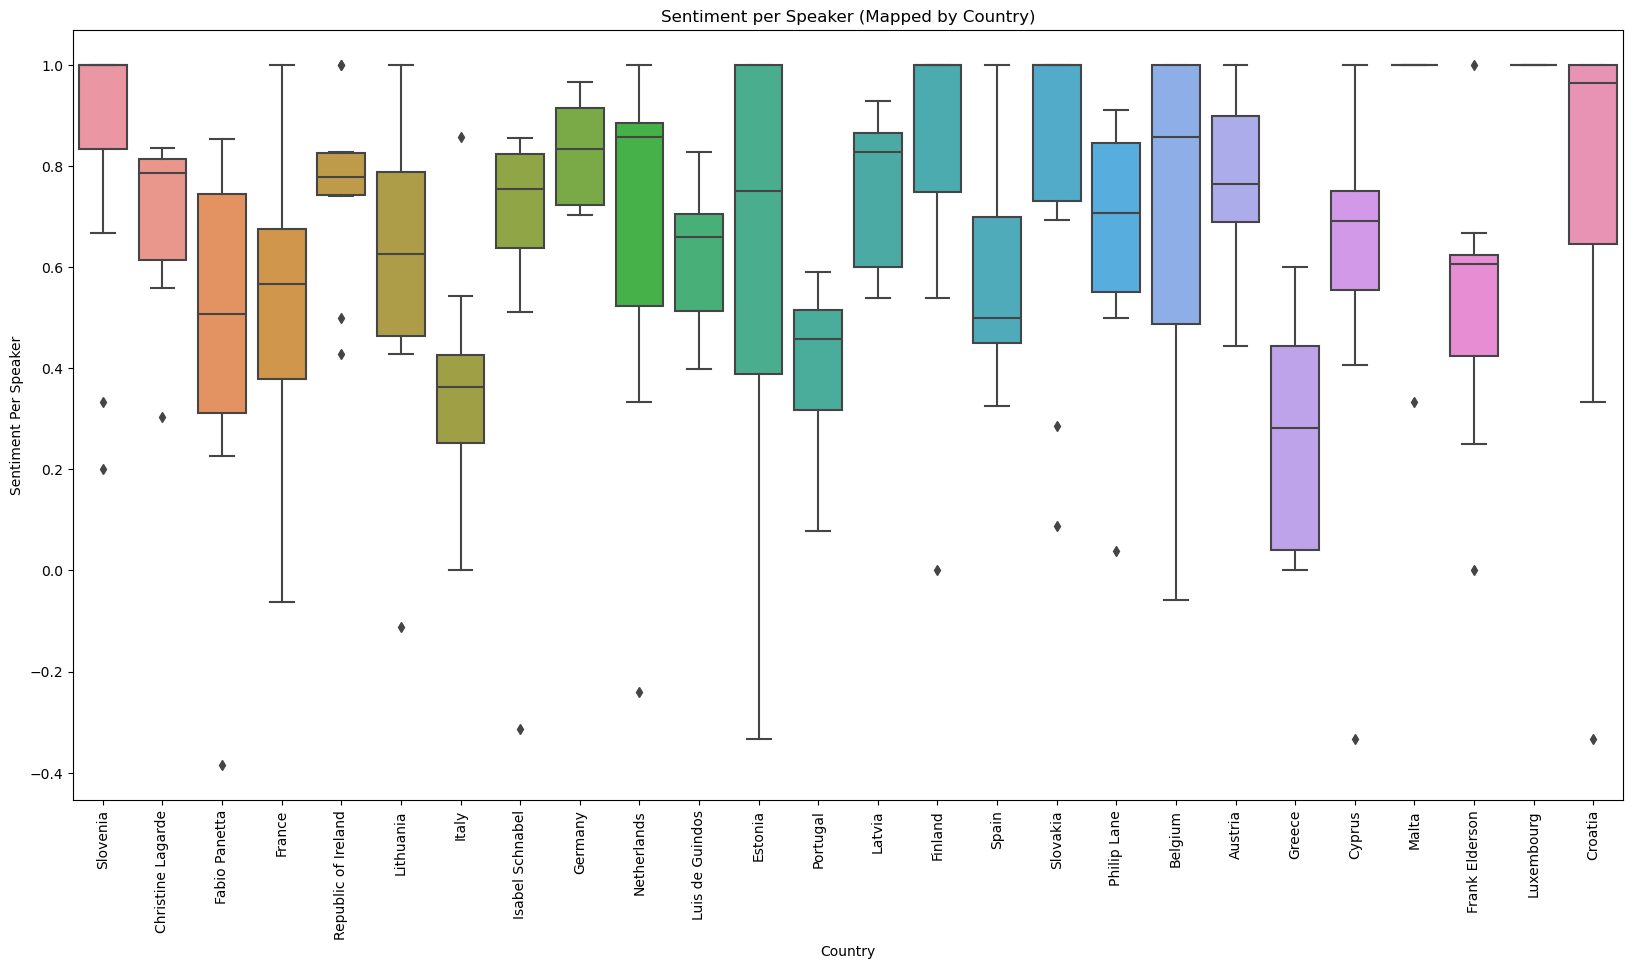

In [487]:
# Box plot for sentiment per speaker (now by country)
plt.figure(figsize=(20, 10))
sns.boxplot(x='Country', y='Sentiment', data=combined_result)
plt.title('Sentiment per Speaker (Mapped by Country)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Sentiment Per Speaker')
plt.show()

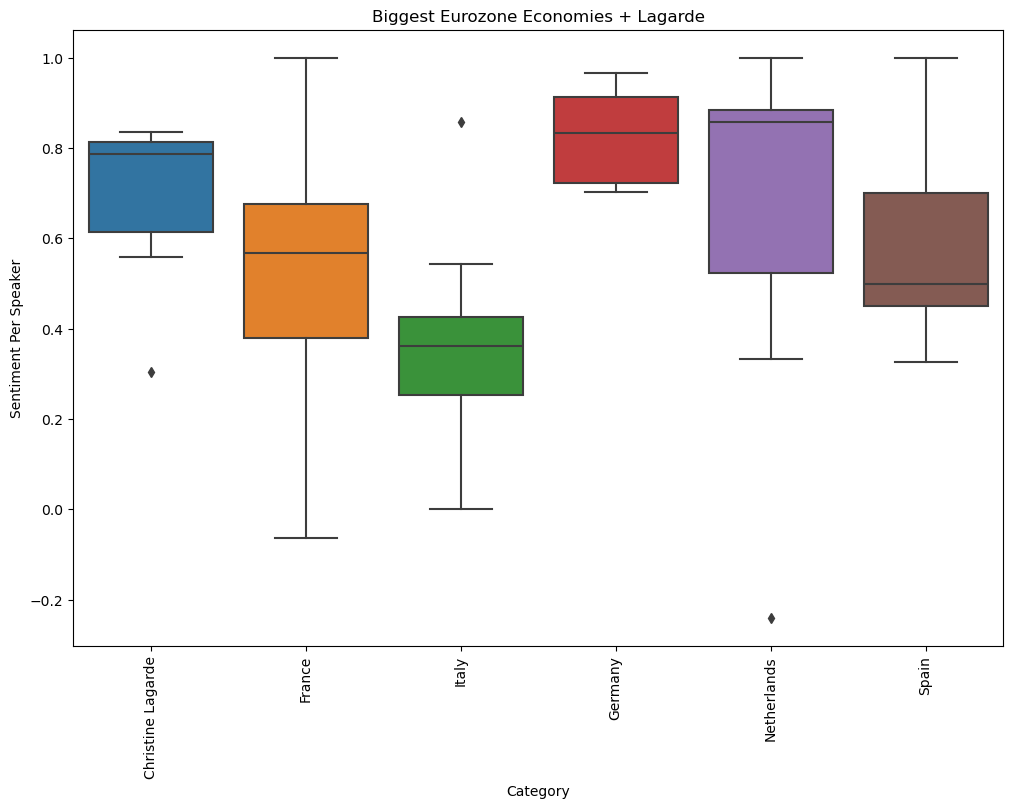

In [488]:
# Define the categories to filter
categories_to_plot = ['Christine Lagarde', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands']

# Filter the DataFrame to include only these categories
filtered_combined_result = combined_result[combined_result['Country'].isin(categories_to_plot)]

# Box plot for sentiment per speaker (now by selected categories)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Sentiment', data=filtered_combined_result)
plt.title('Biggest Eurozone Economies + Lagarde')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Sentiment Per Speaker')
plt.show()


# Index with Lagarde as Baseline

Sentiment with Lagarde as Baseline

In [489]:
# Ensure the 'Period' column is in datetime format
combined_result['Period'] = pd.to_datetime(combined_result['Period'])

# Extract Christine Lagarde's sentiment per period
lagarde_sentiment = combined_result[combined_result['Name_of_Speaker'] == 'Christine Lagarde'][['Period', 'Sentiment']]
lagarde_sentiment = lagarde_sentiment.rename(columns={'Sentiment': 'Lagarde_Sentiment'}) 
lagarde_sentiment


Period  Lagarde_Sentiment
1   2022-07-21           0.828452
22  2022-09-08           0.786194
48  2022-10-27           0.708268
73  2022-12-15           0.819095
97  2023-02-02           0.807810
121 2023-03-16           0.646684
147 2023-05-04           0.835127
173 2023-06-15           0.801483
198 2023-07-27           0.558382
222 2023-09-14           0.580268
248 2023-10-26           0.303125

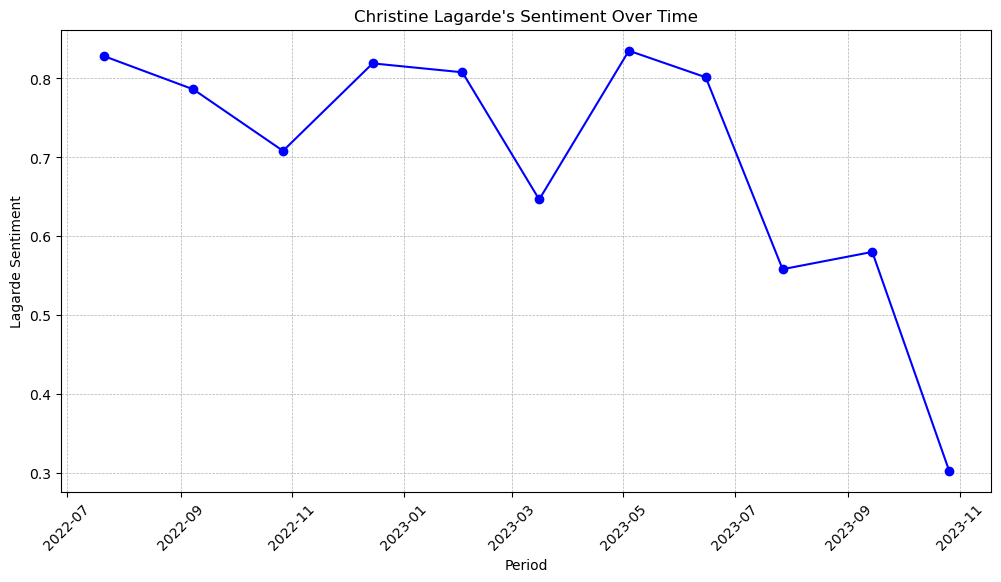

In [490]:
import matplotlib.pyplot as plt

# Plot Christine Lagarde's sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(lagarde_sentiment['Period'], lagarde_sentiment['Lagarde_Sentiment'], marker='o', color='blue')
plt.title("Christine Lagarde's Sentiment Over Time")
plt.xlabel("Period")
plt.ylabel("Lagarde Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


In [491]:
# Merge Lagarde's sentiment with the combined_result dataframe
combined_result_with_lagarde = pd.merge(combined_result, lagarde_sentiment, on='Period', how='left')

# Calculate the absolute difference for each governor's sentiment compared to Lagarde's sentiment
combined_result_with_lagarde['Discordance'] = abs(combined_result_with_lagarde['Sentiment'] - combined_result_with_lagarde['Lagarde_Sentiment'])

# Group by Name_of_Speaker and Period to calculate statistics
discordance_stats = combined_result_with_lagarde.groupby(['Name_of_Speaker', 'Period']).agg({
    'Discordance': ['mean', 'min', 'max', 'std']
}).reset_index()

# Flatten the multi-level columns
discordance_stats.columns = ['Name_of_Speaker', 'Period', 'Mean_Discordance', 'Min_Discordance', 'Max_Discordance', 'Std_Discordance']

discordance_stats

Name_of_Speaker     Period  Mean_Discordance  Min_Discordance  \
0         Boris Vujcic 2022-12-15          0.180905         0.180905   
1         Boris Vujcic 2023-02-02          0.192190         0.192190   
2         Boris Vujcic 2023-03-16          0.281887         0.281887   
3         Boris Vujcic 2023-05-04          0.164873         0.164873   
4         Boris Vujcic 2023-06-15          0.198517         0.198517   
..                 ...        ...               ...              ...   
260  Yannis Stournaras 2023-05-04          0.553877         0.553877   
261  Yannis Stournaras 2023-06-15          0.461058         0.461058   
262  Yannis Stournaras 2023-07-27          0.499558         0.499558   
263  Yannis Stournaras 2023-09-14          0.556738         0.556738   
264  Yannis Stournaras 2023-10-26          0.063125         0.063125   

     Max_Discordance  Std_Discordance  
0           0.180905              NaN  
1           0.192190              NaN  
2           0.281887              NaN  
3           0.164873              NaN  
4           0.198517              NaN  
..               ...              ...  
260         0.553877              NaN  
261         0.461058              NaN  
262         0.499558              NaN  
263         0.556738              NaN  
264         0.063125              NaN  

[265 rows x 6 columns]

Difference positive or negative

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


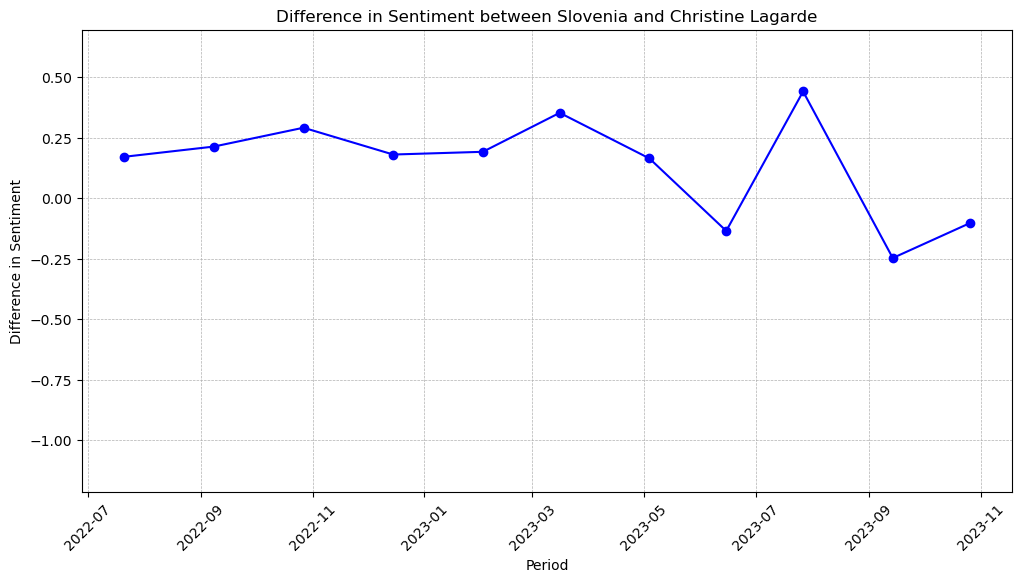

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


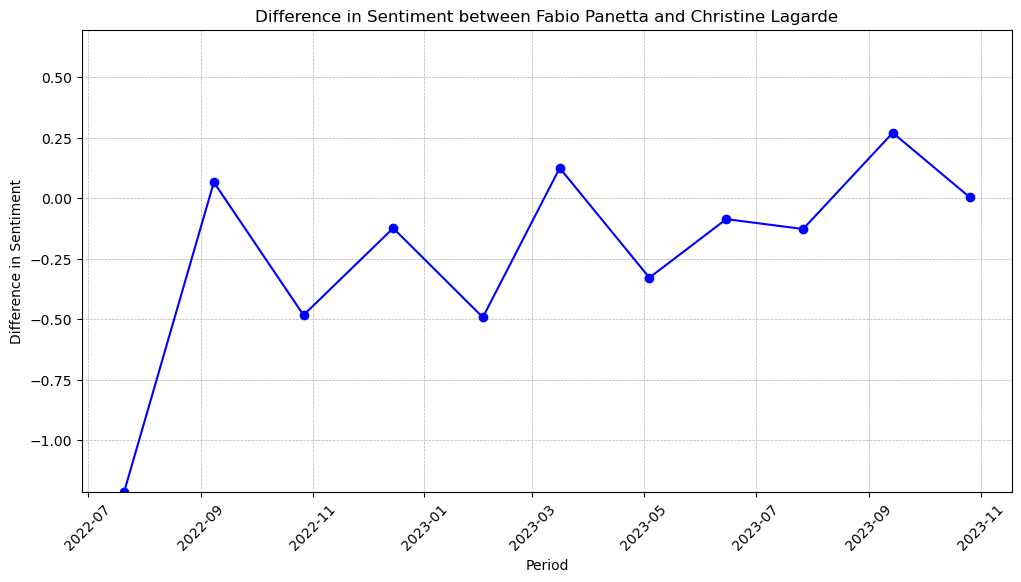

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


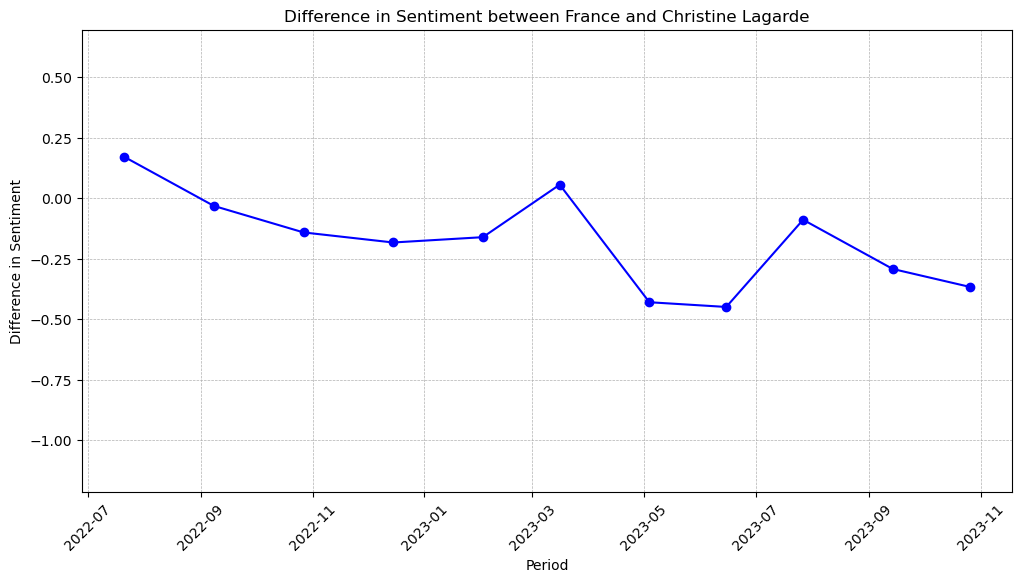

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


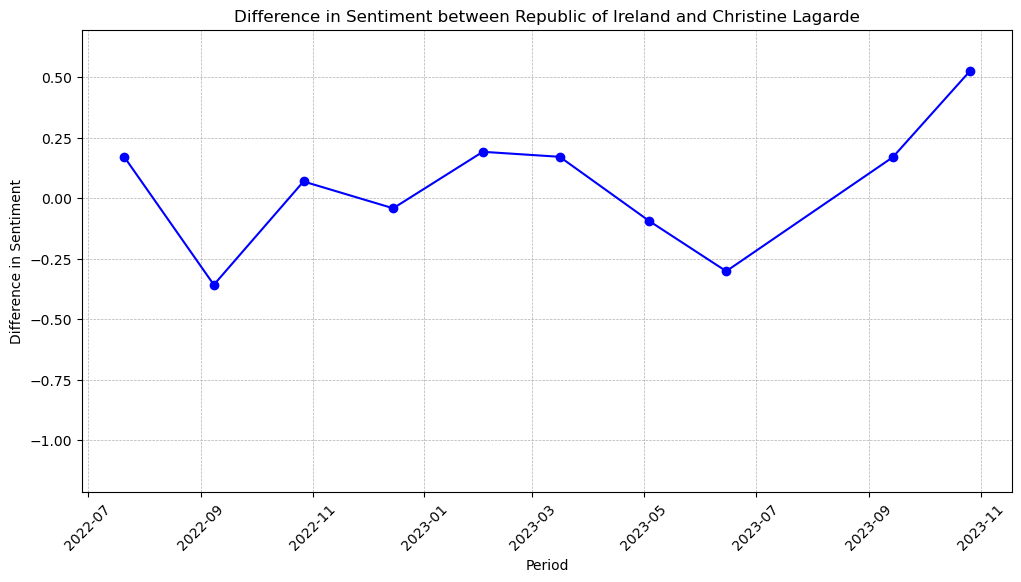

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


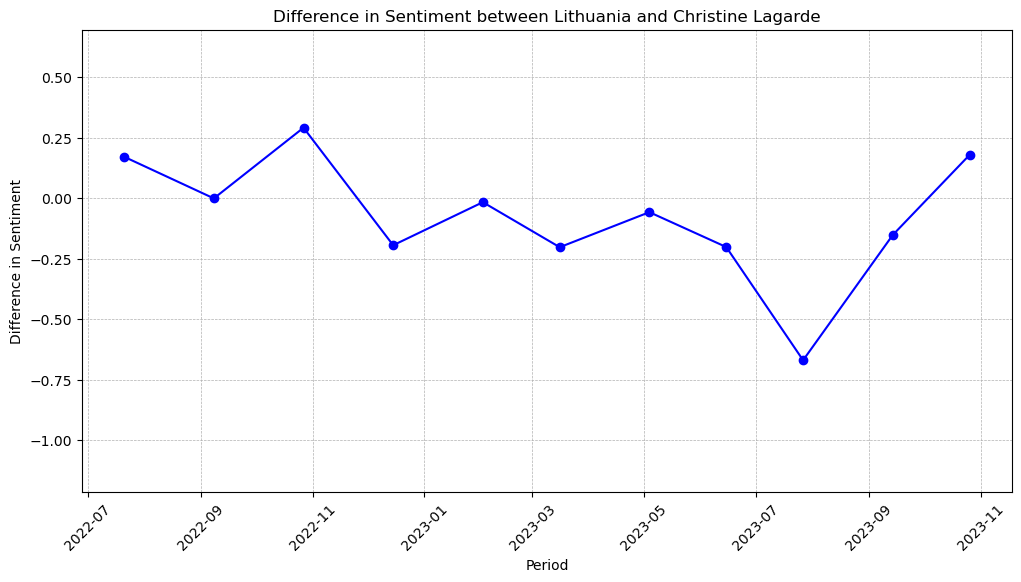

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


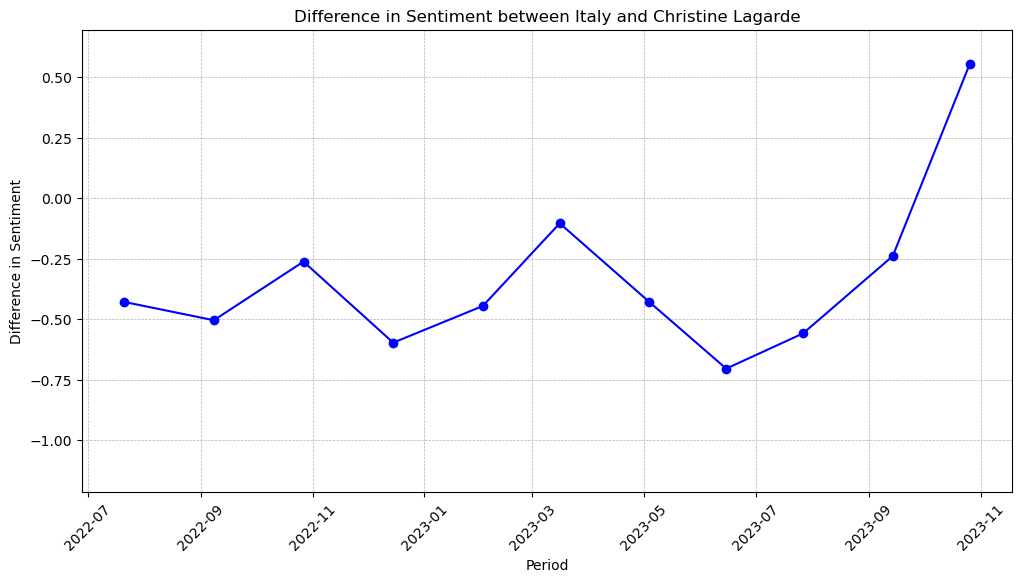

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


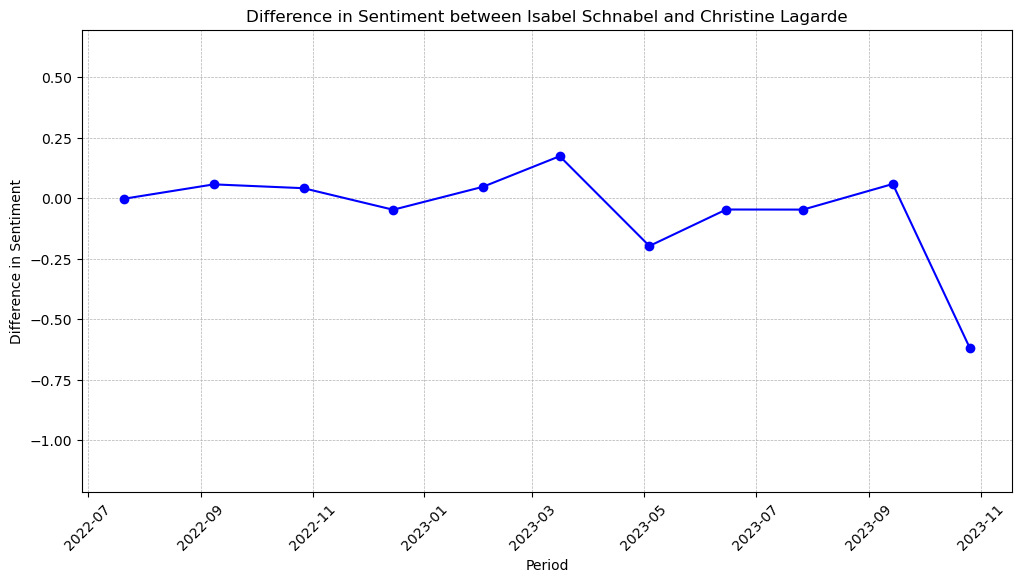

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


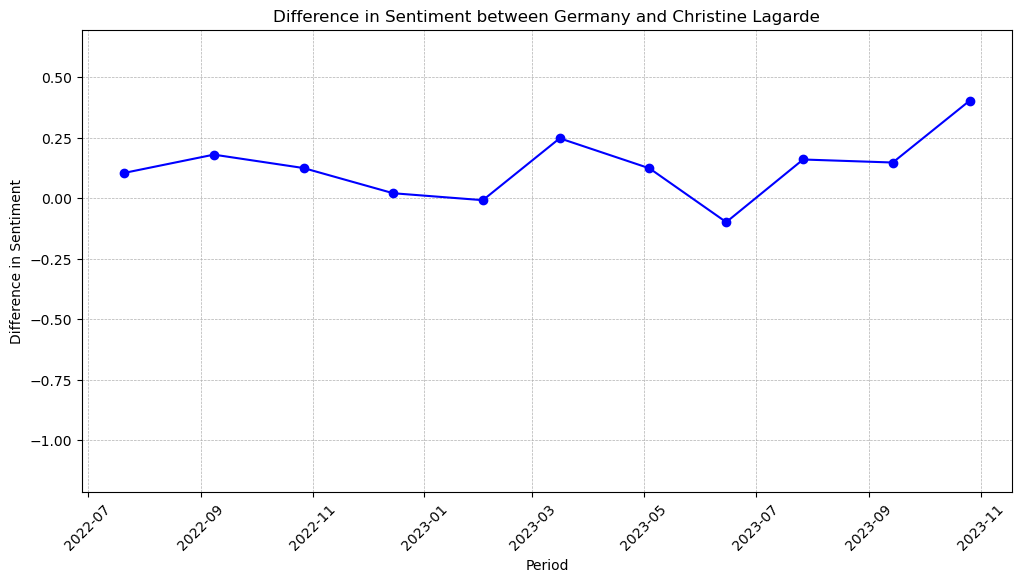

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


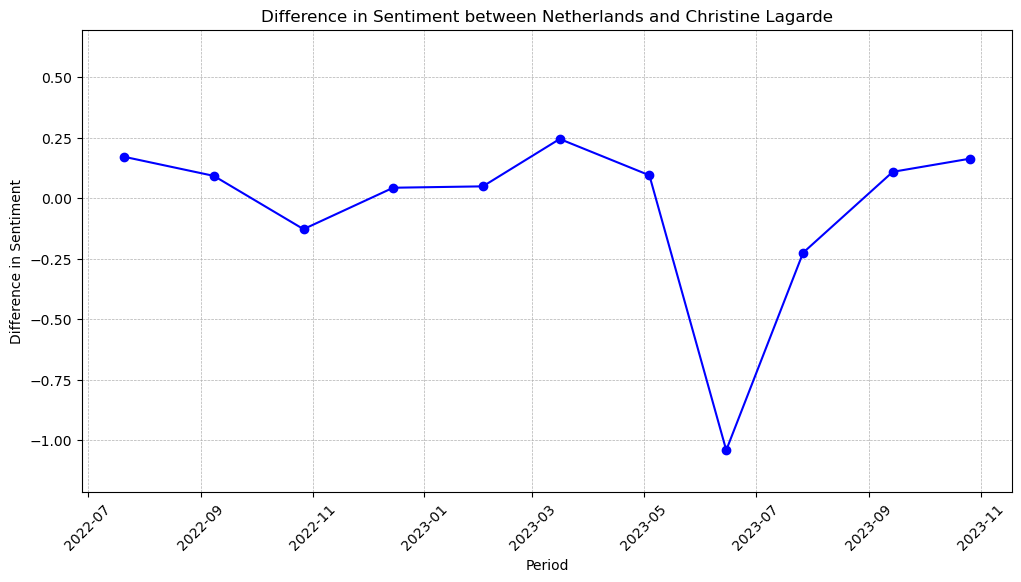

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


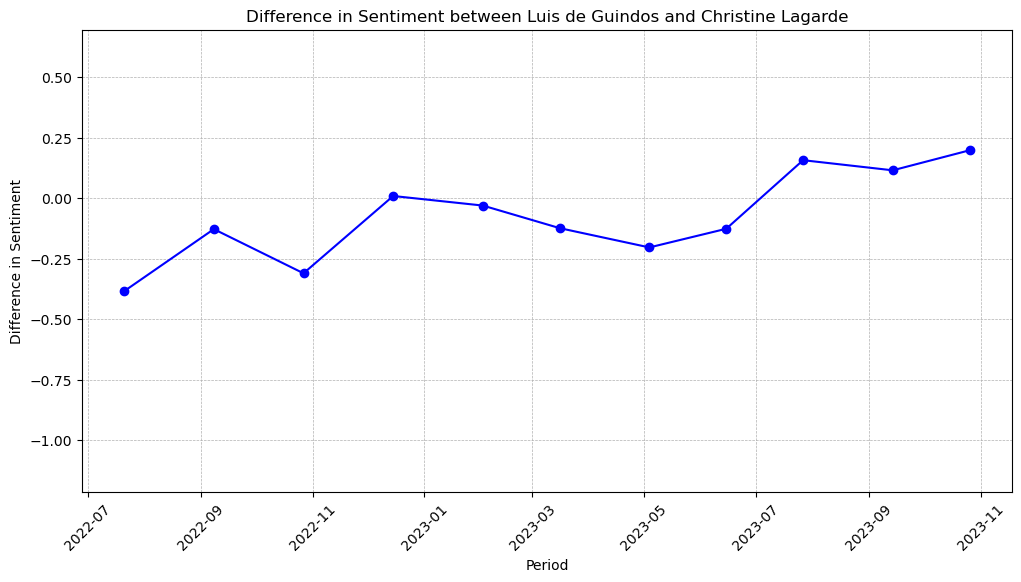

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


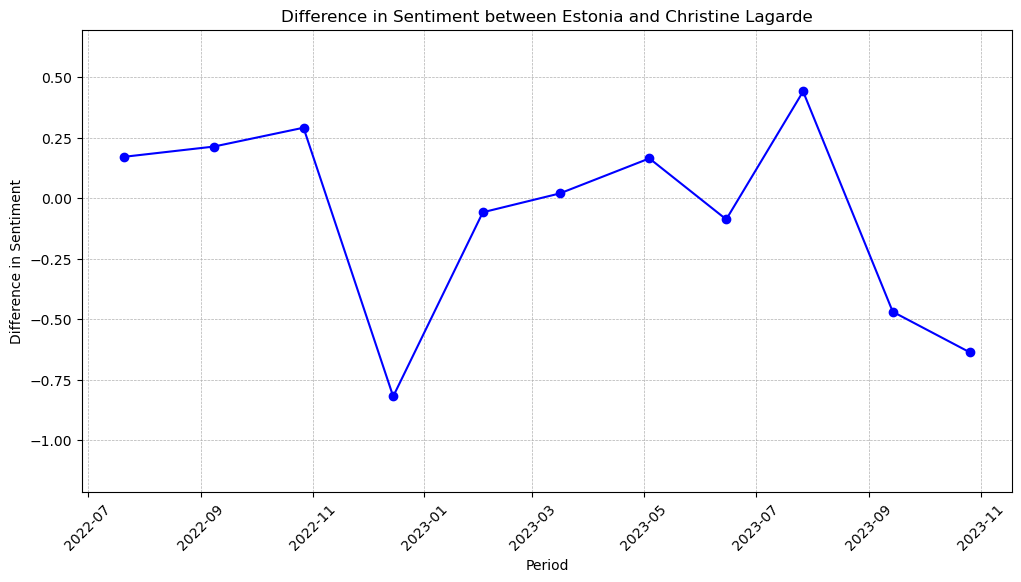

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


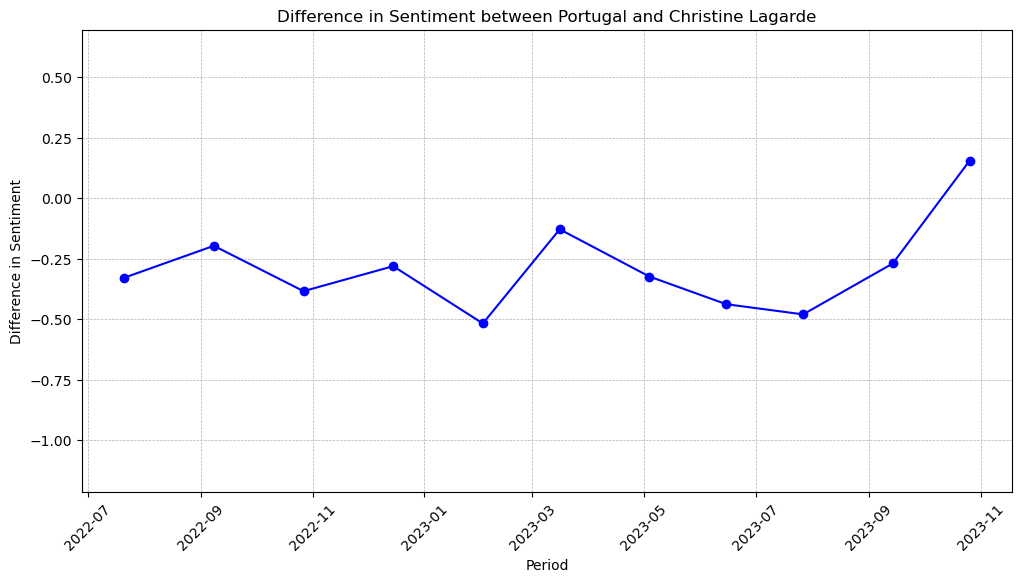

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


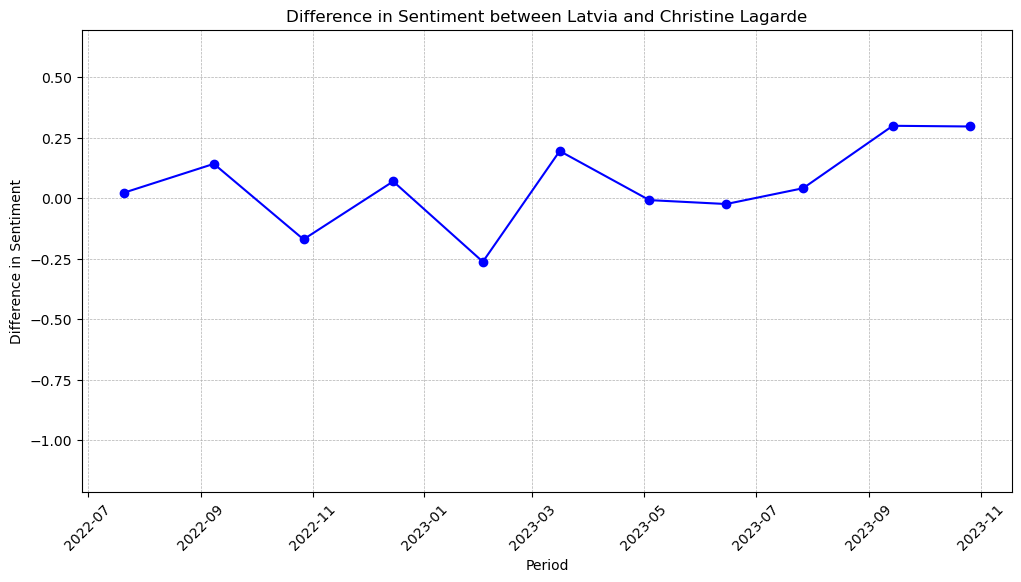

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


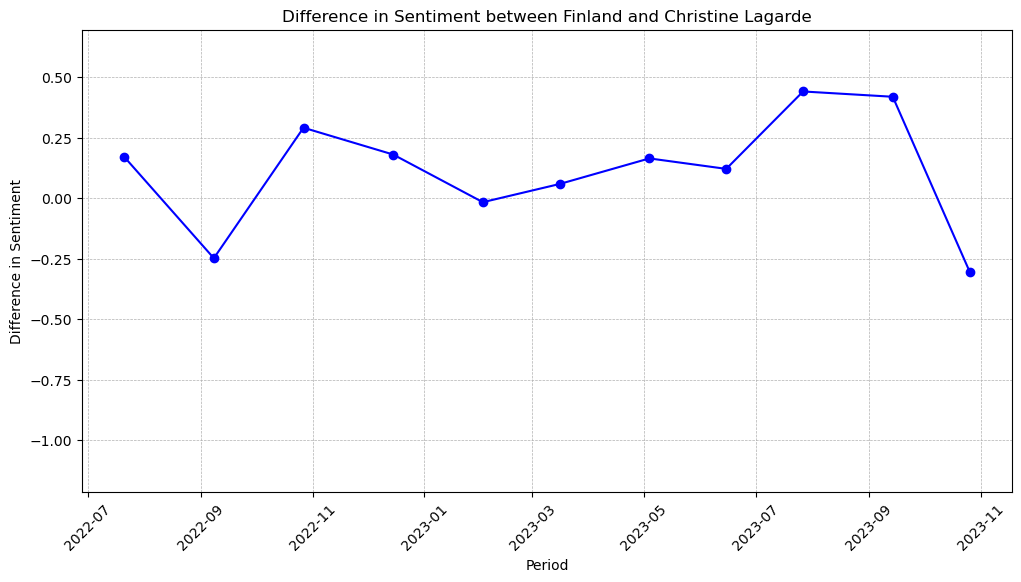

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


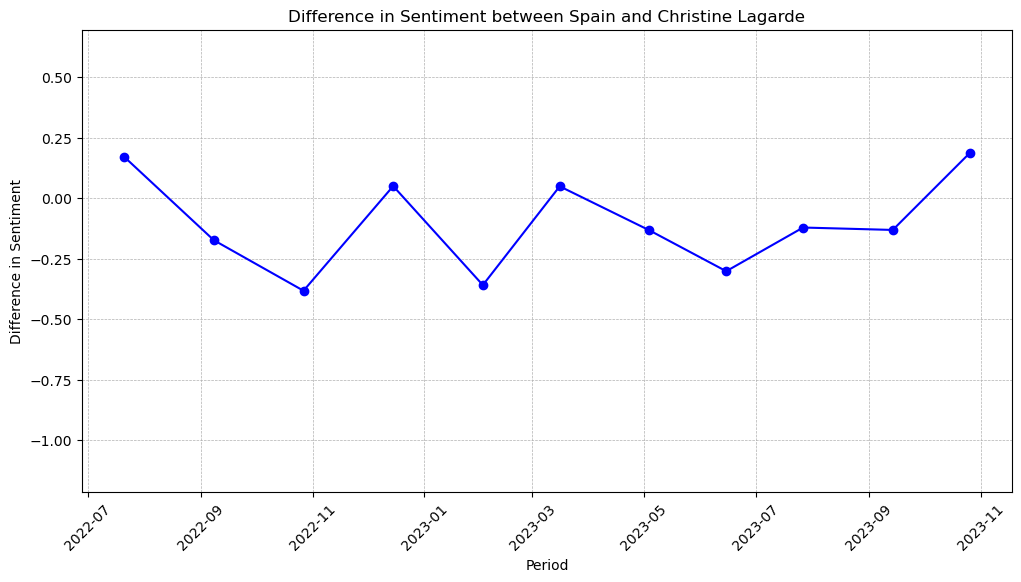

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


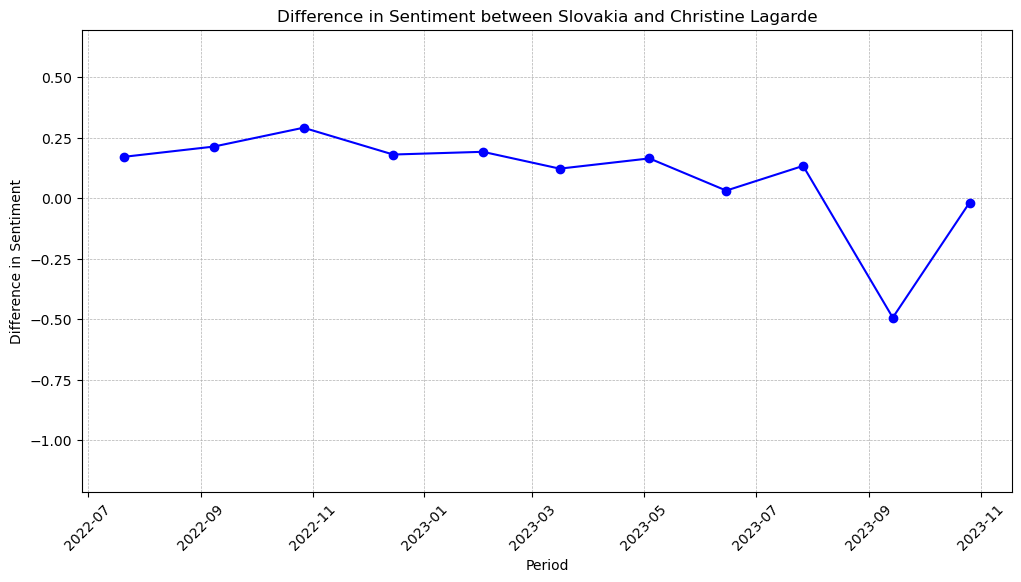

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


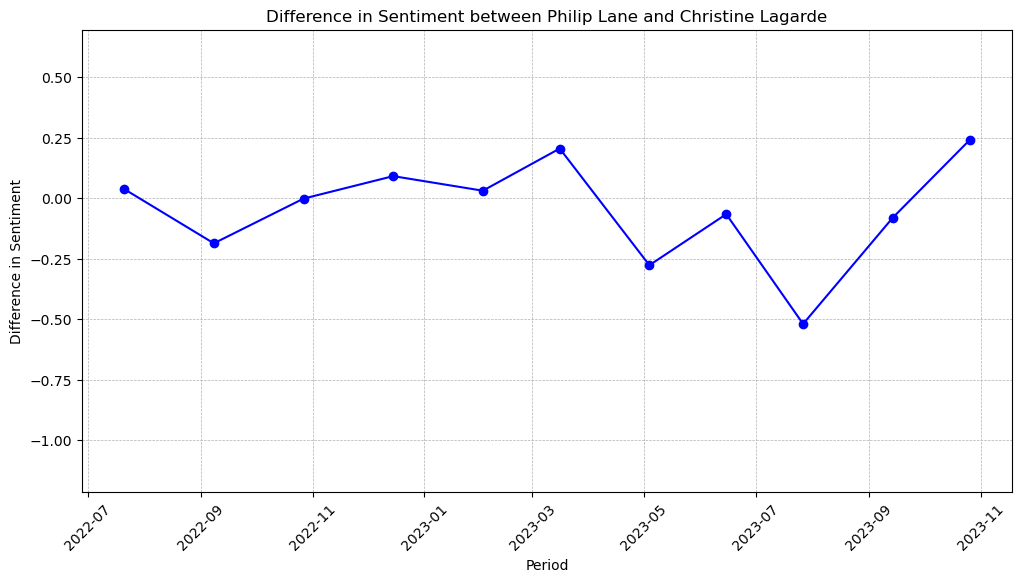

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


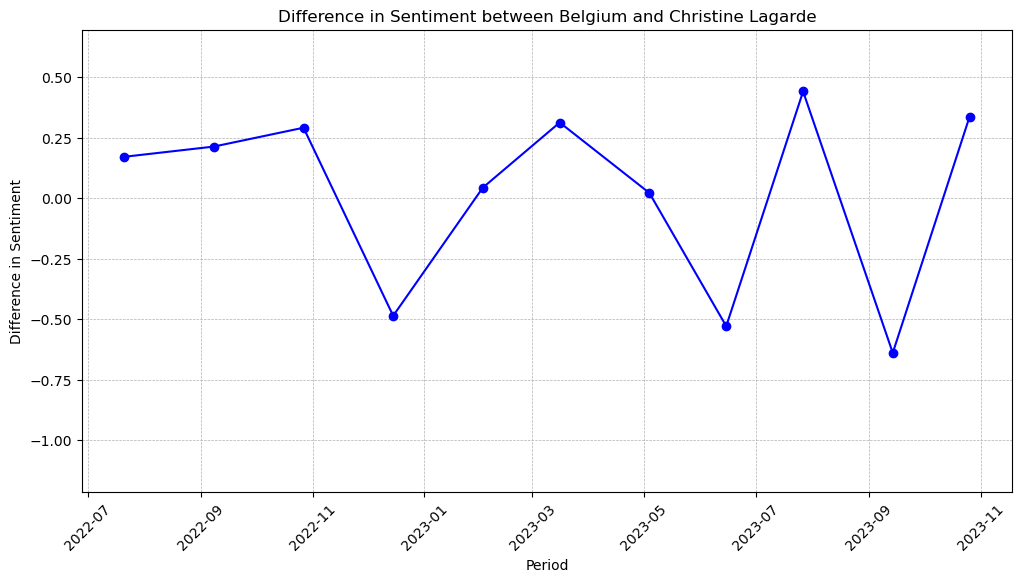

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


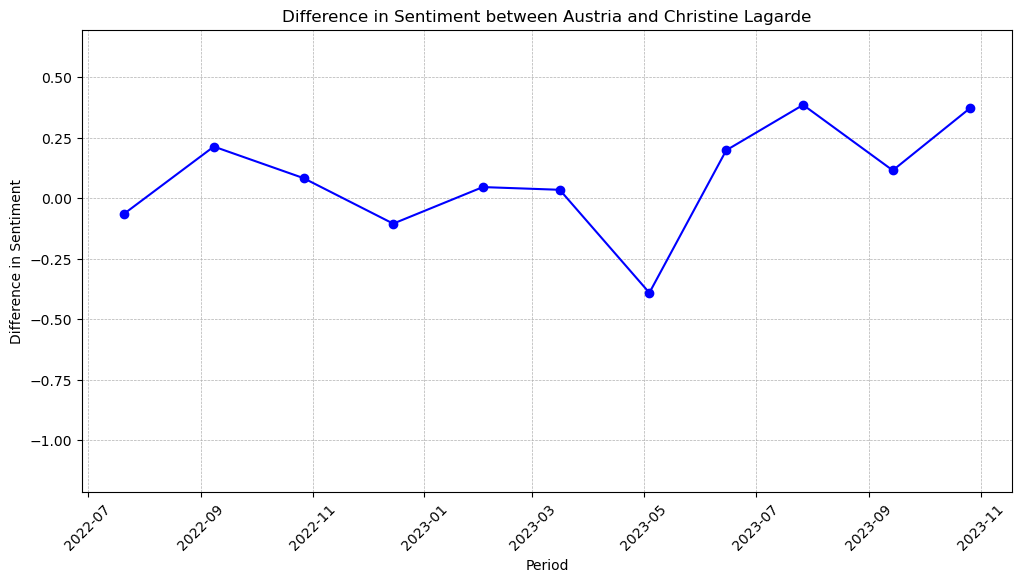

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


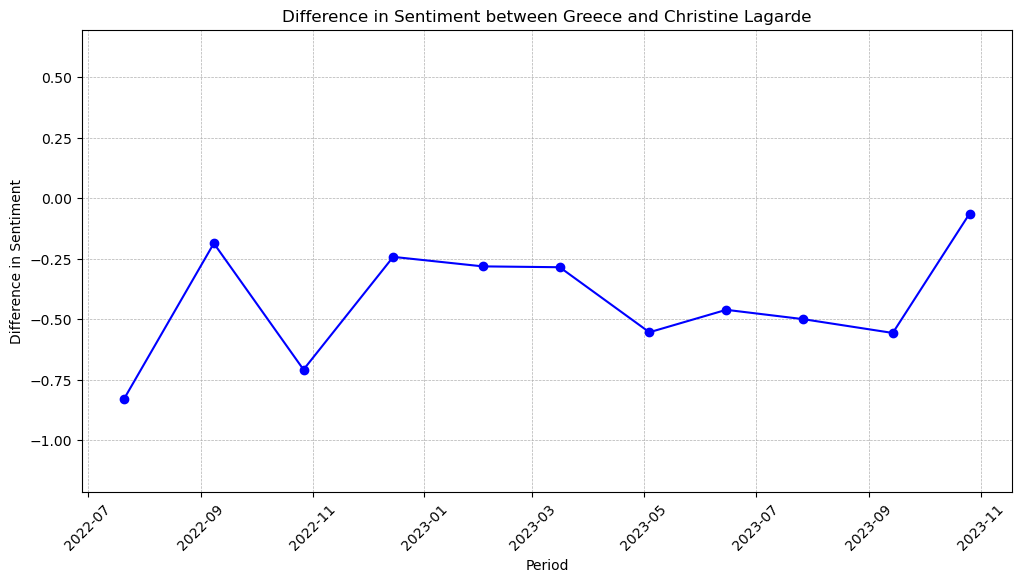

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


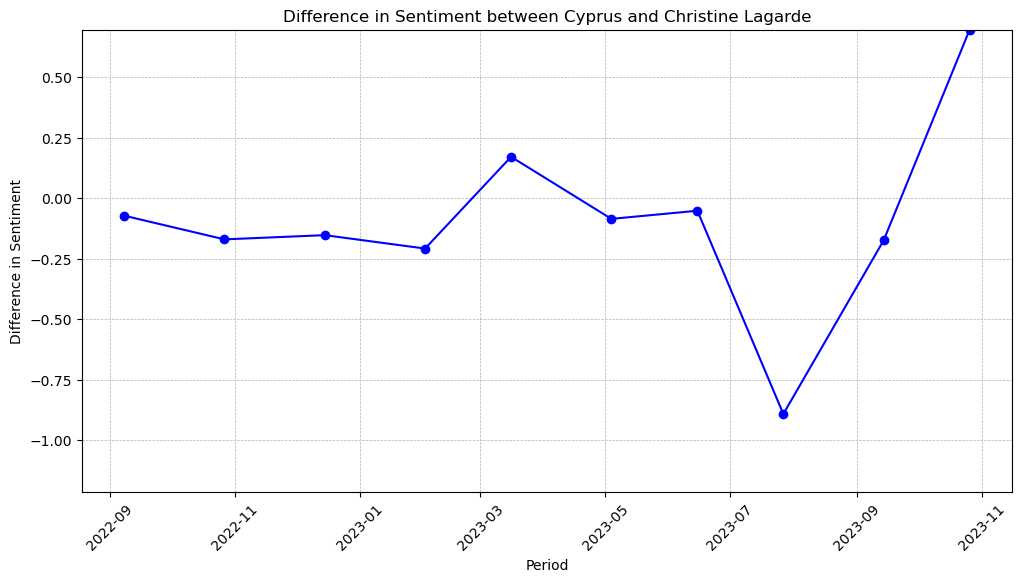

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


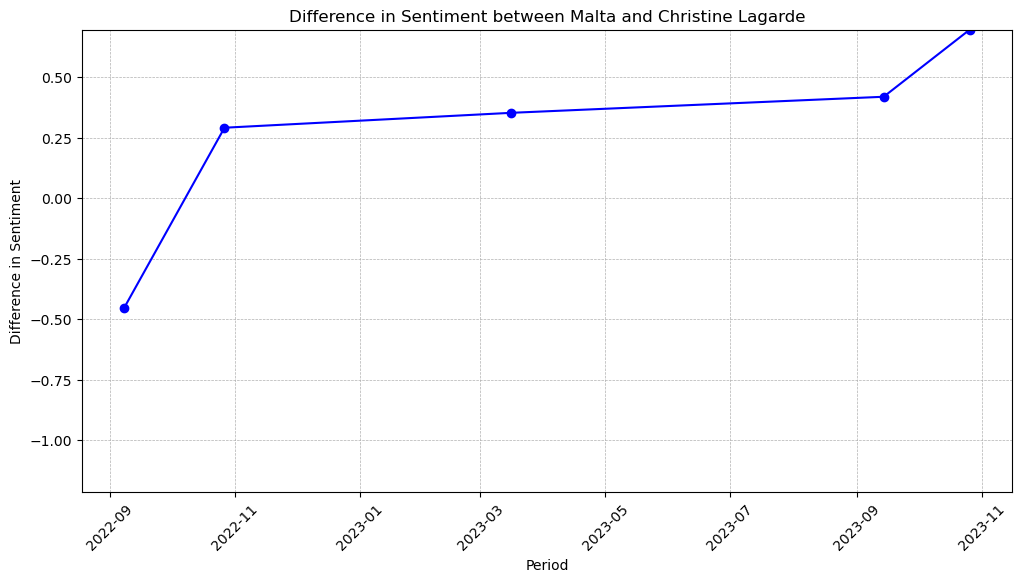

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


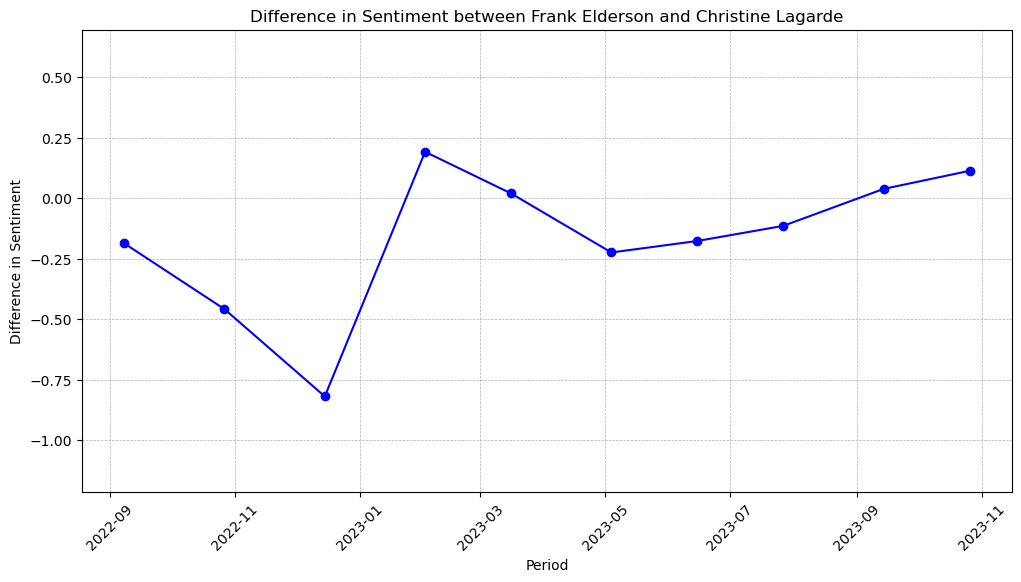

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


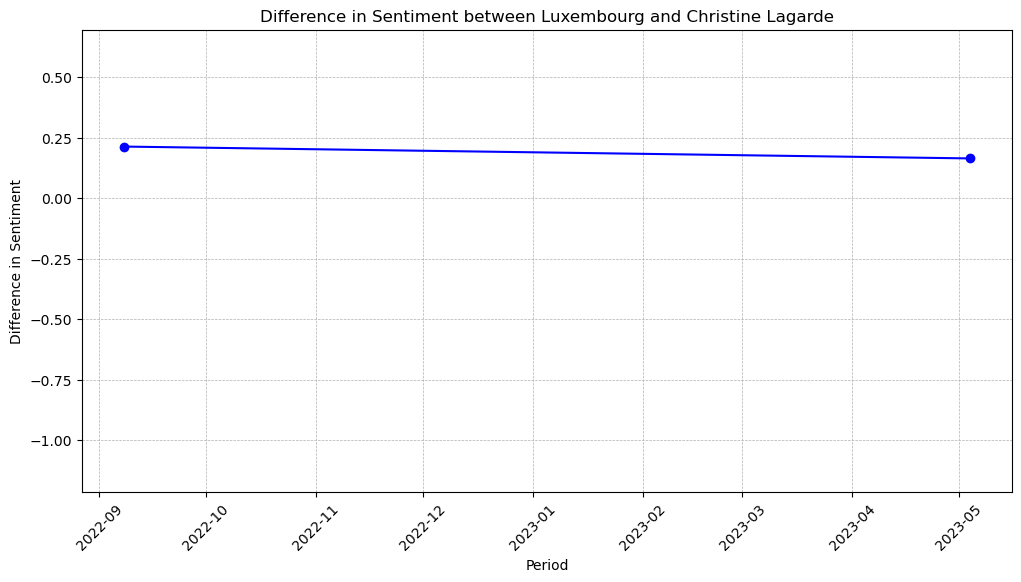

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/490517489.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']


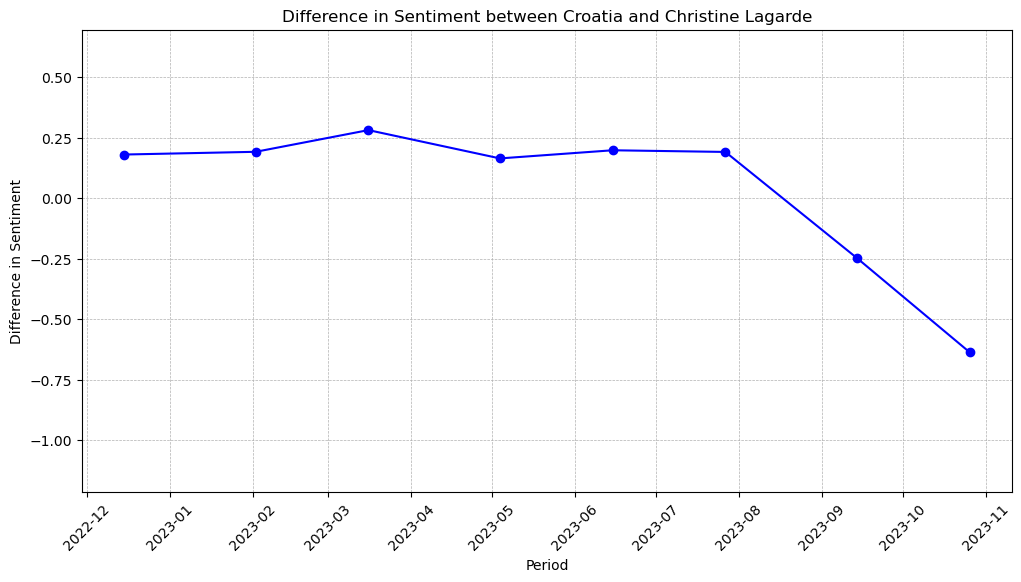

In [492]:
# Get the list of unique countries excluding Christine Lagarde
countries = combined_result_with_lagarde['Country'].unique()
countries = countries[countries != 'Christine Lagarde']

# Calculate the maximum and minimum differences across all countries to set consistent y-axis limits
min_diff = float('inf')
max_diff = float('-inf')
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    differences = country_data['Sentiment'] - country_data['Lagarde_Sentiment']
    min_diff = min(min_diff, differences.min())
    max_diff = max(max_diff, differences.max())

# Plot each country's sentiment vs Lagarde's sentiment and the differences
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    
    # Compute the differences
    country_data['Difference'] = country_data['Sentiment'] - country_data['Lagarde_Sentiment']
    
    # Line plot of differences over time
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Period'], country_data['Difference'], marker='o', color='blue')
    plt.title(f"Difference in Sentiment between {country} and Christine Lagarde")
    plt.xlabel("Period")
    plt.ylabel("Difference in Sentiment")
    plt.ylim(min_diff, max_diff)  # Set the y-axis limit to ensure consistency
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.show()


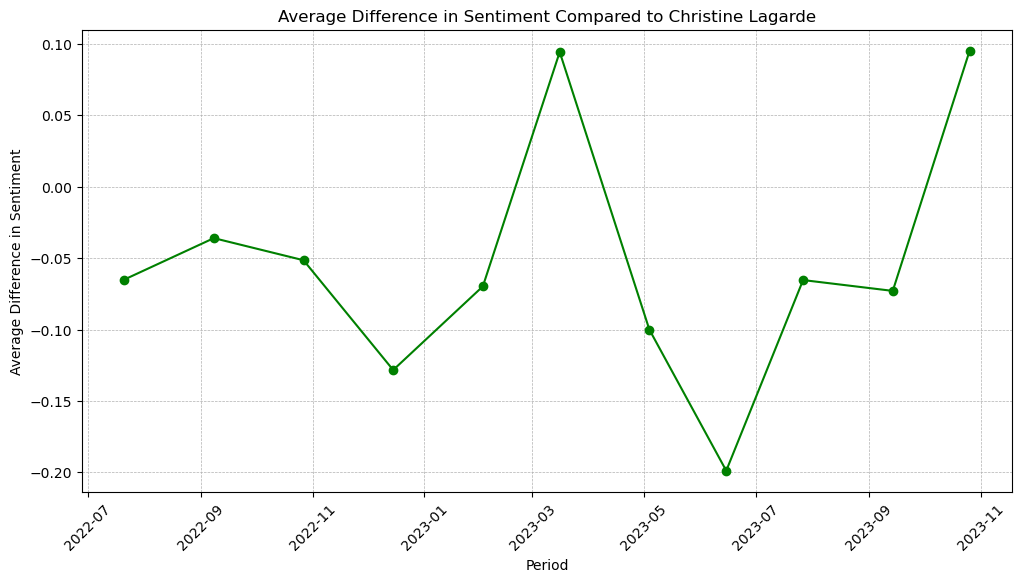

In [493]:
# Ensure the 'Period' column is in datetime format
combined_result_with_lagarde['Period'] = pd.to_datetime(combined_result_with_lagarde['Period'])

# Compute the differences for each country compared to Christine Lagarde
combined_result_with_lagarde['Difference'] = combined_result_with_lagarde['Sentiment'] - combined_result_with_lagarde['Lagarde_Sentiment']

# Calculate the average difference for each period
average_difference = combined_result_with_lagarde.groupby('Period')['Difference'].mean().reset_index()

# Plot the average difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_difference['Period'], average_difference['Difference'], marker='o', color='green')
plt.title("Average Difference in Sentiment Compared to Christine Lagarde")
plt.xlabel("Period")
plt.ylabel("Average Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/3760418807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_result['Difference'] = filtered_combined_result['Sentiment'] - filtered_combined_result['Lagarde_Sentiment']


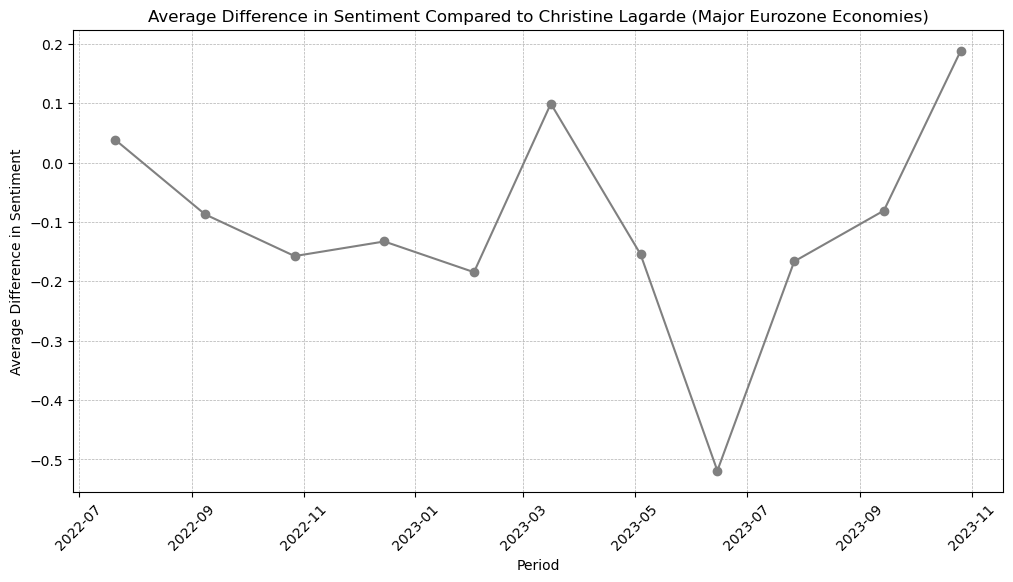

In [494]:
# List of major Eurozone economies
major_economies = ['France', 'Germany', 'Italy', 'Spain', 'Netherlands']

# Filter the DataFrame to include only the major Eurozone economies
filtered_combined_result = combined_result_with_lagarde[combined_result_with_lagarde['Country'].isin(major_economies)]

# Compute the differences for each country compared to Christine Lagarde
filtered_combined_result['Difference'] = filtered_combined_result['Sentiment'] - filtered_combined_result['Lagarde_Sentiment']

# Calculate the average difference for each period
average_difference = filtered_combined_result.groupby('Period')['Difference'].mean().reset_index()

# Plot the average difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_difference['Period'], average_difference['Difference'], marker='o', color='grey')
plt.title("Average Difference in Sentiment Compared to Christine Lagarde (Major Eurozone Economies)")
plt.xlabel("Period")
plt.ylabel("Average Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


# Absolute Differences Vs Largarde

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


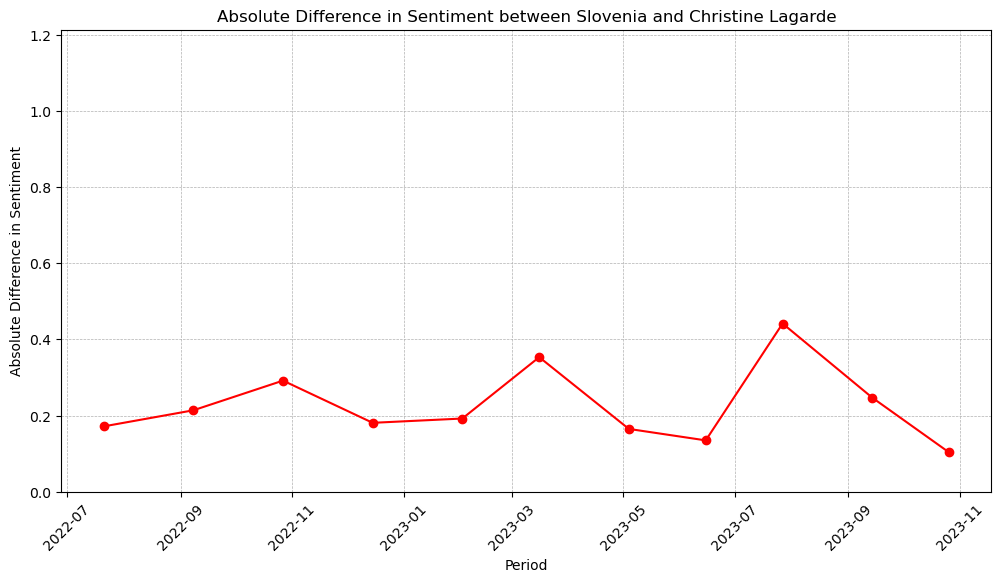

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


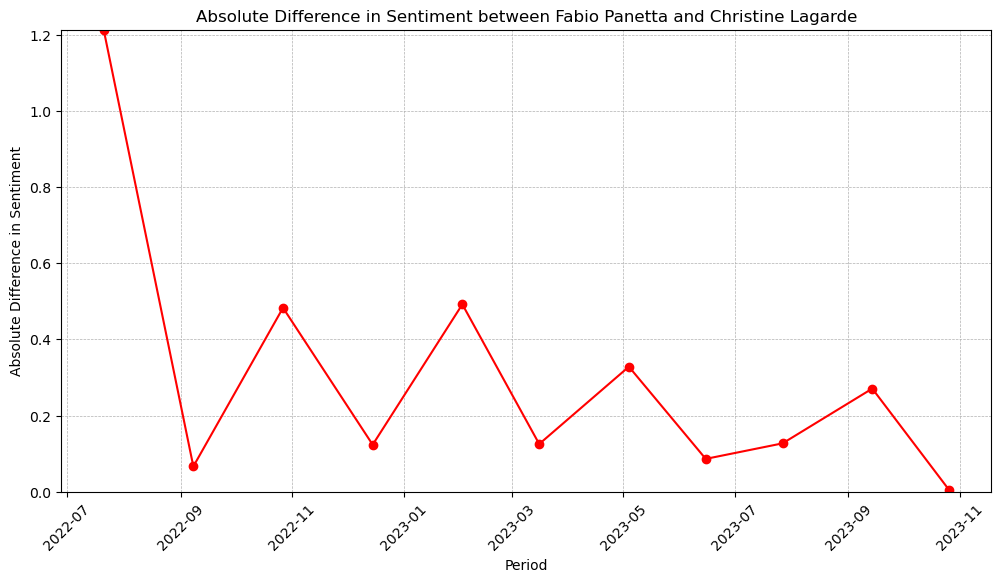

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


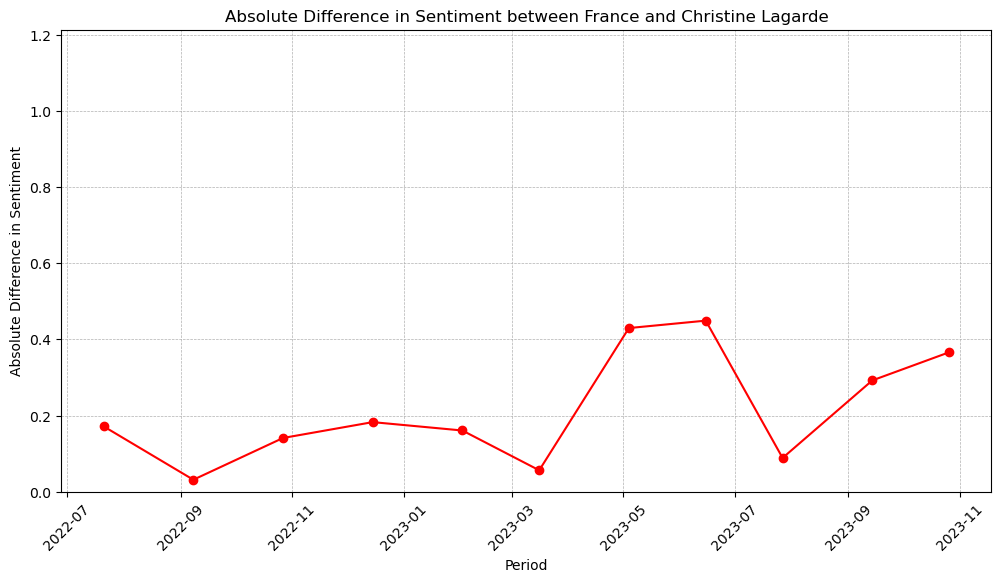

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


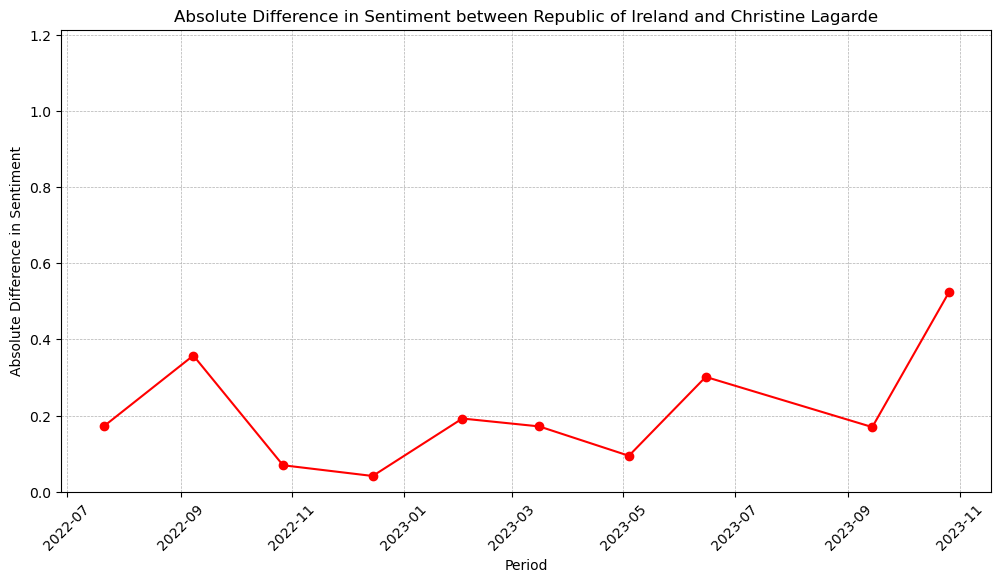

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


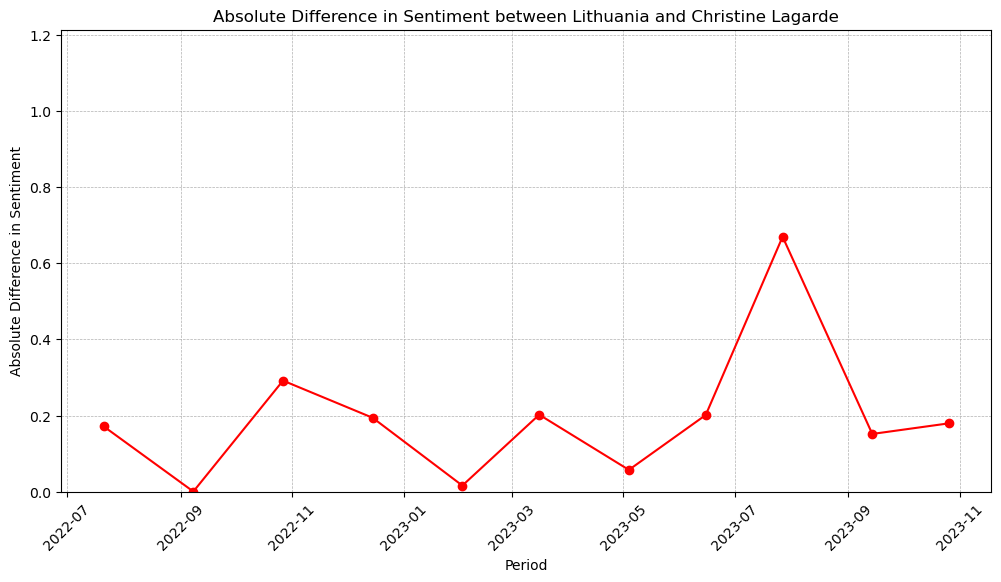

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


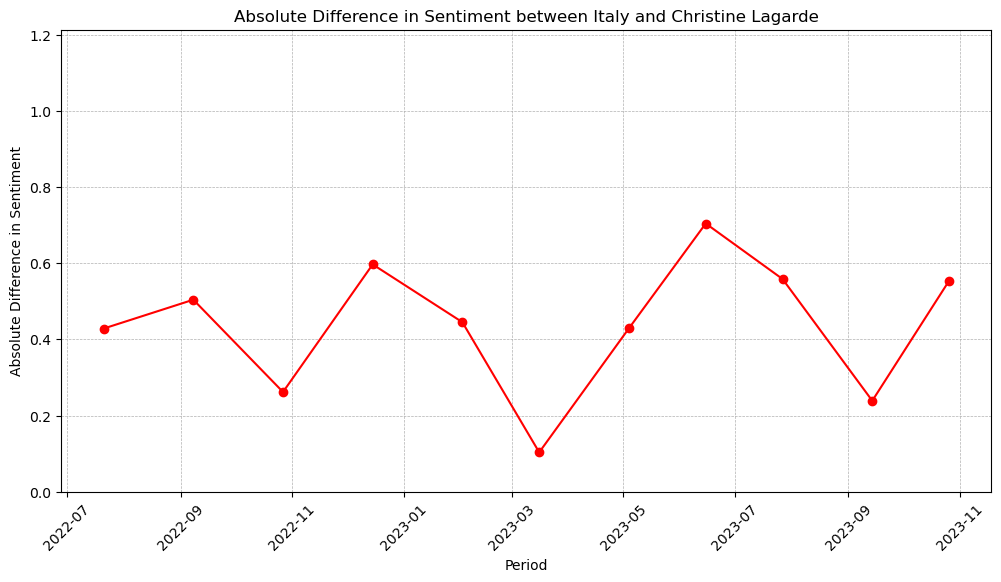

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


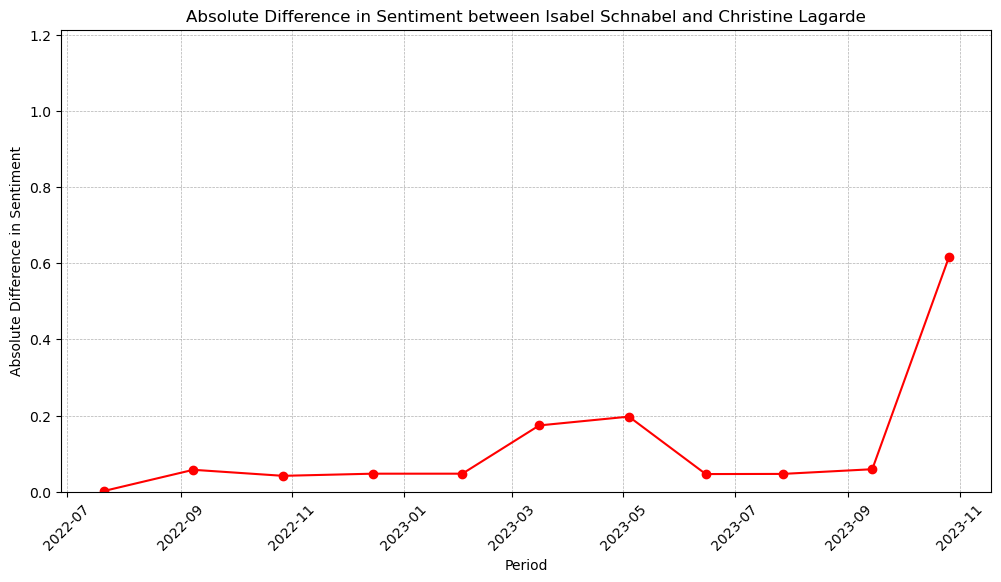

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


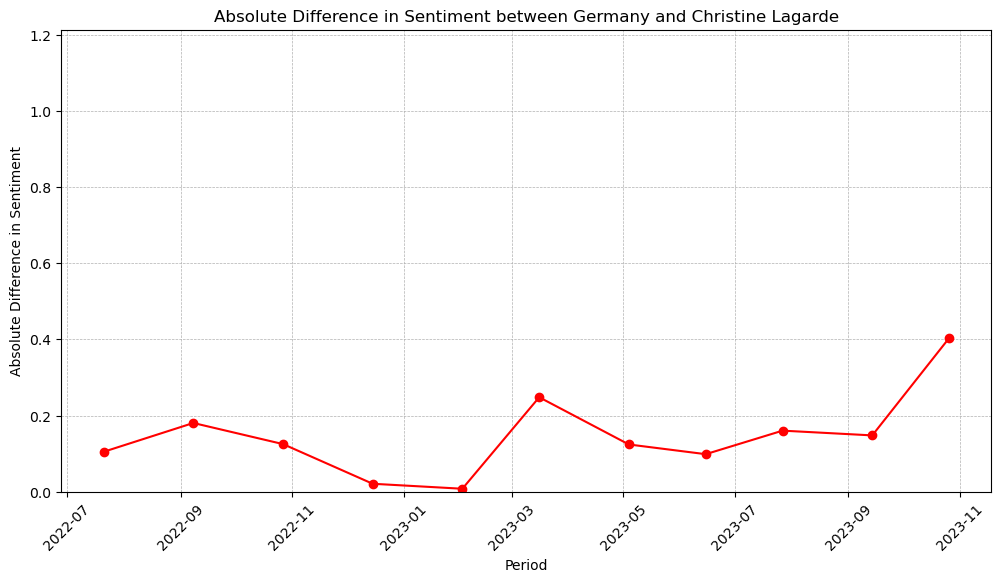

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


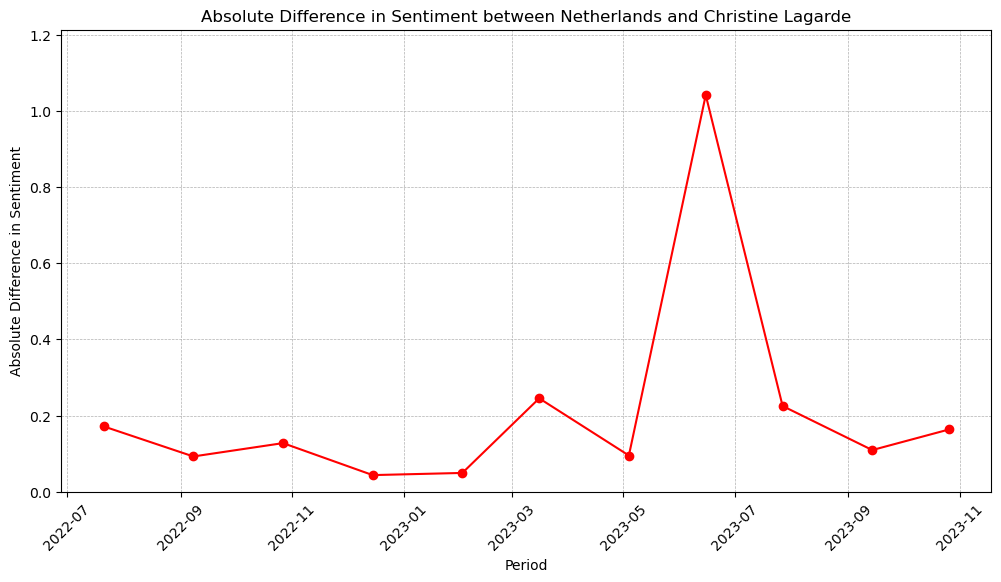

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


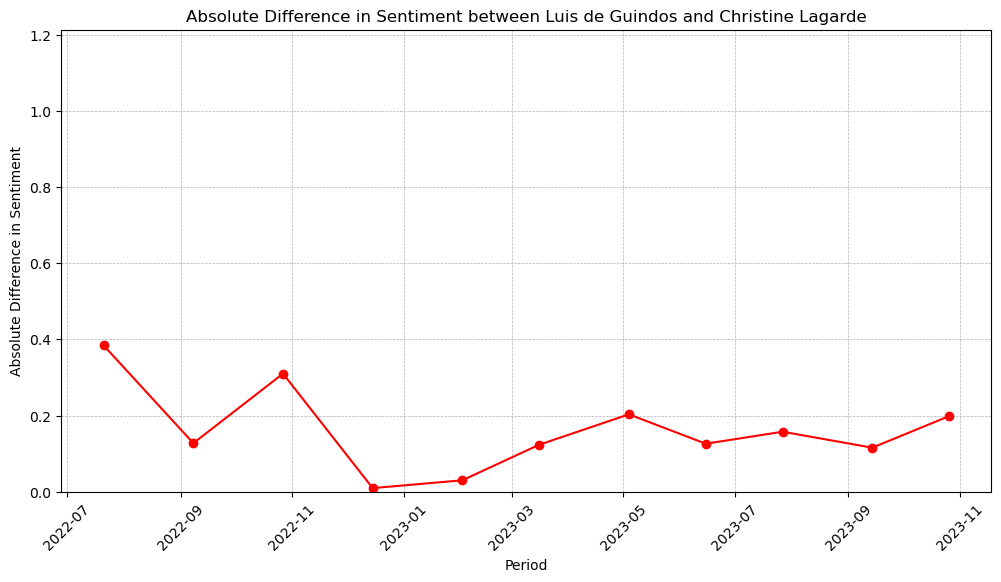

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


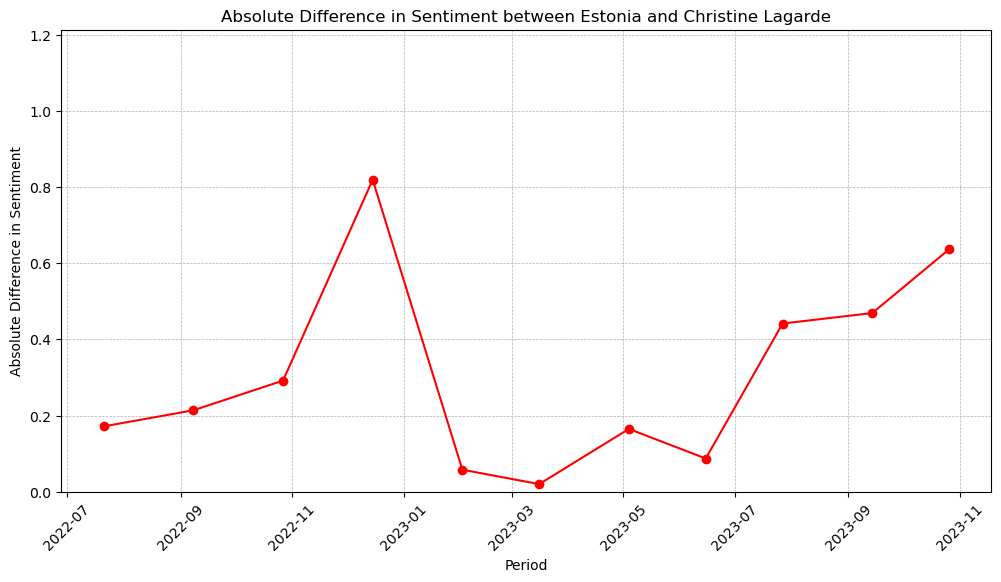

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


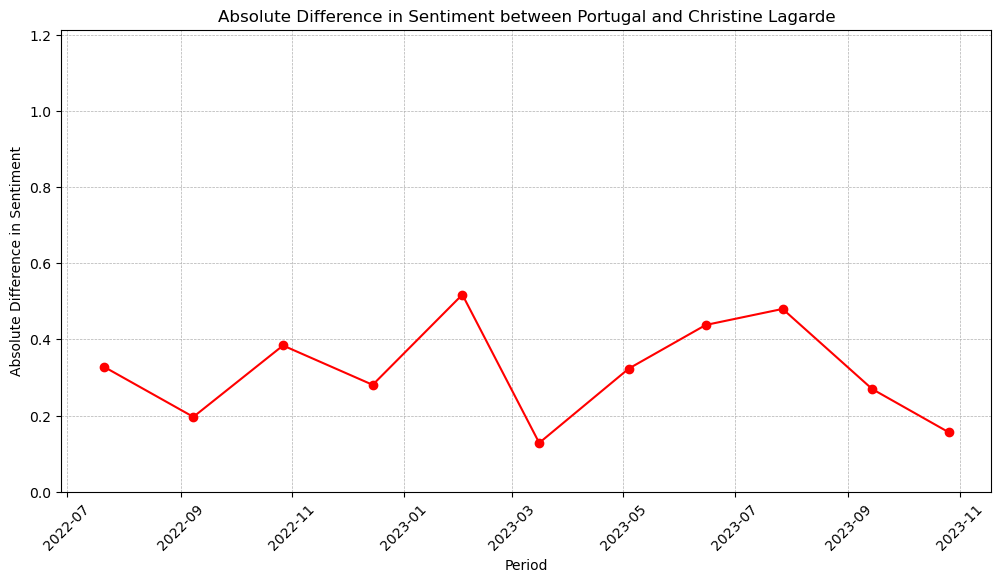

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


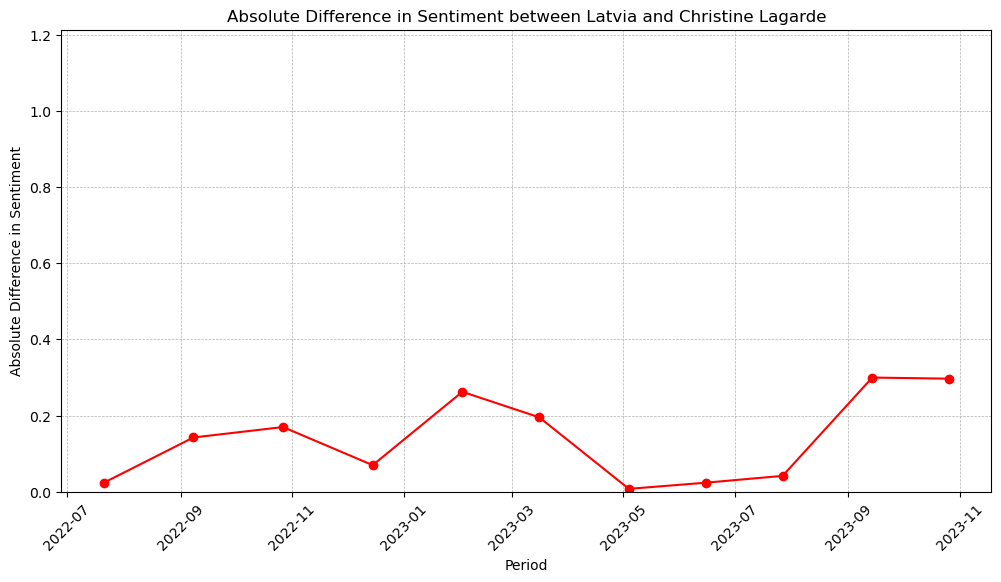

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


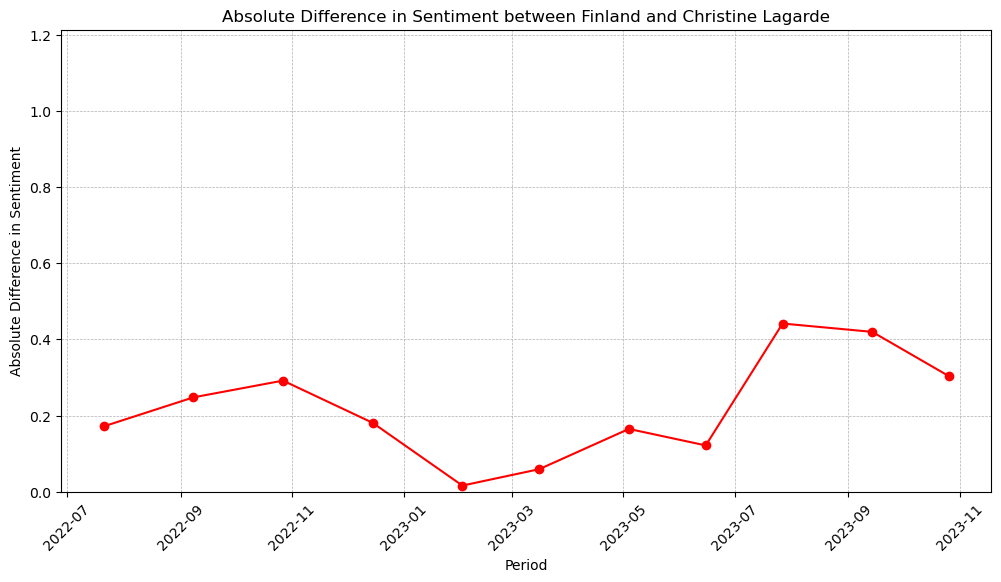

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


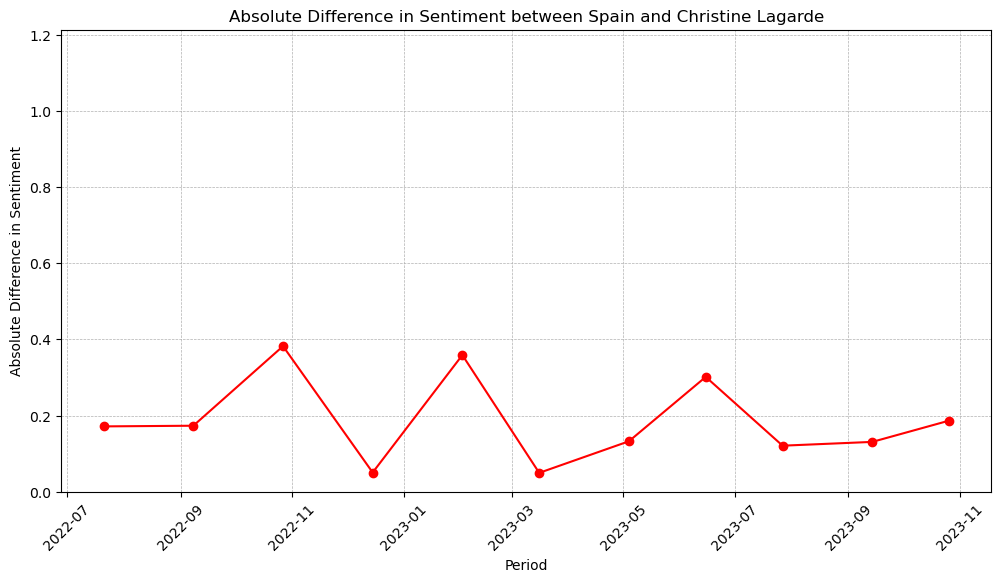

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


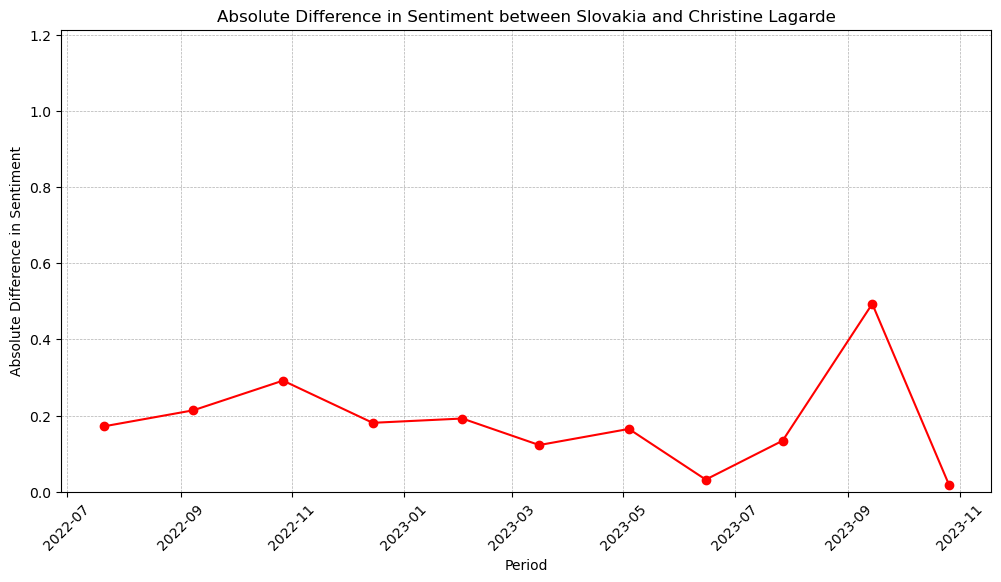

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


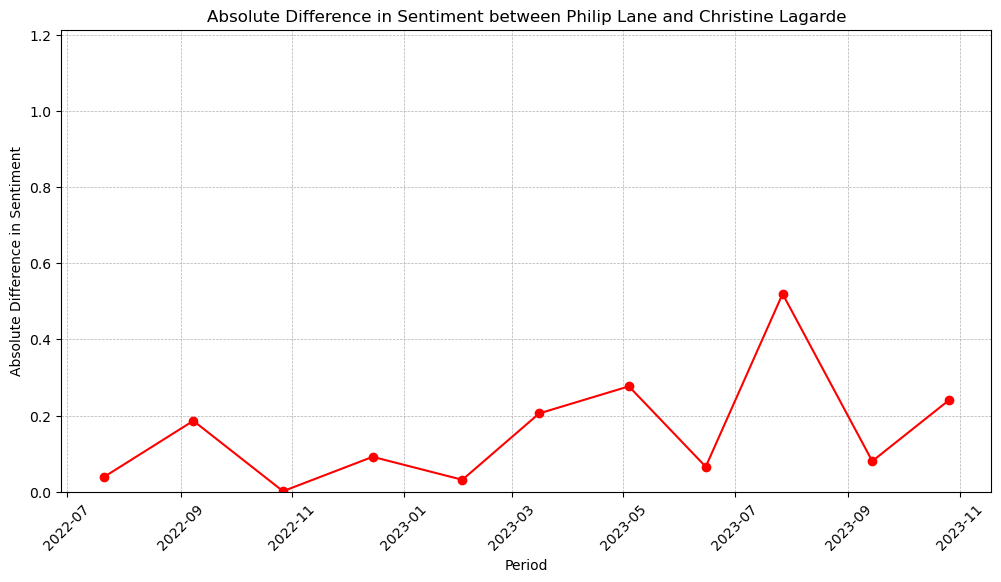

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


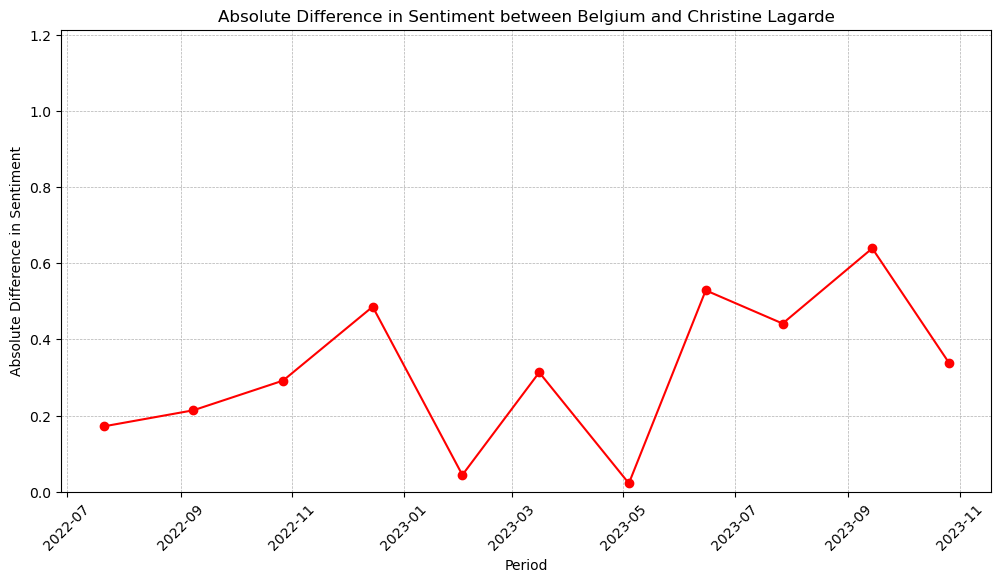

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


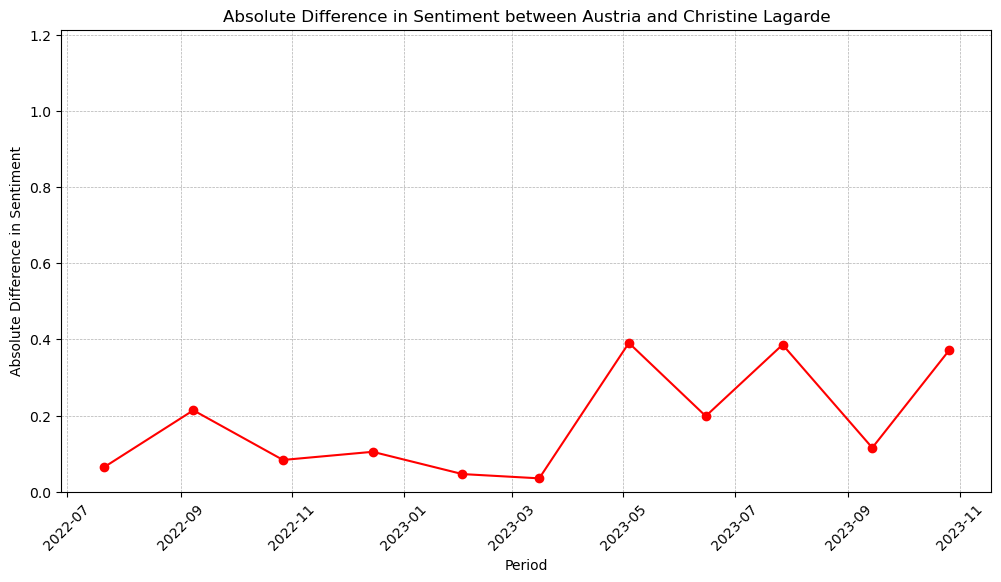

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


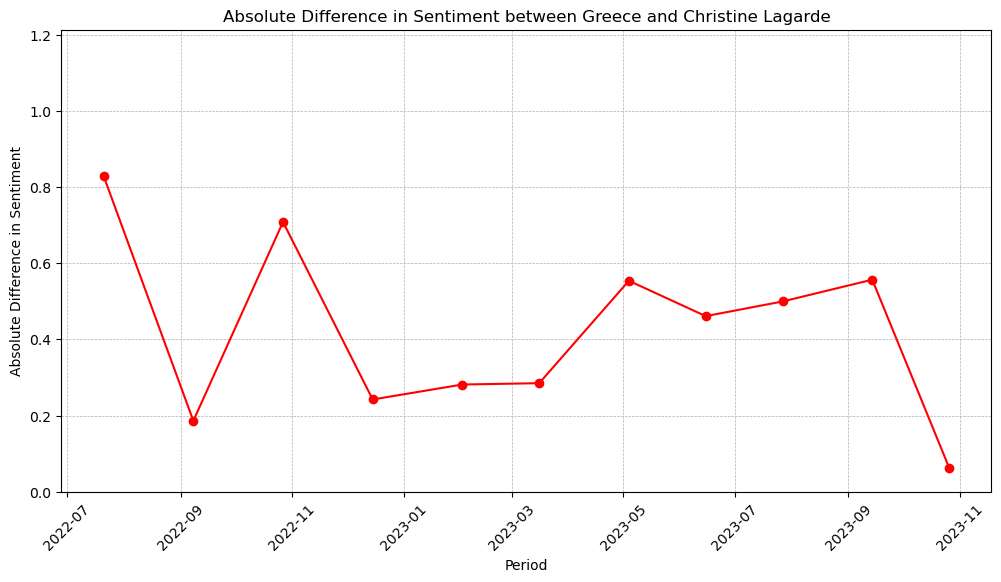

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


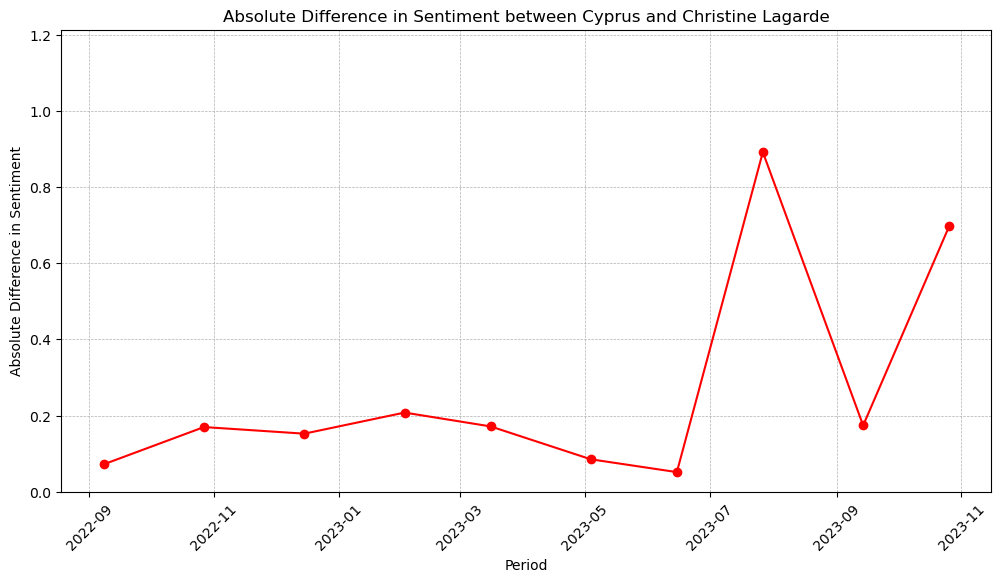

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


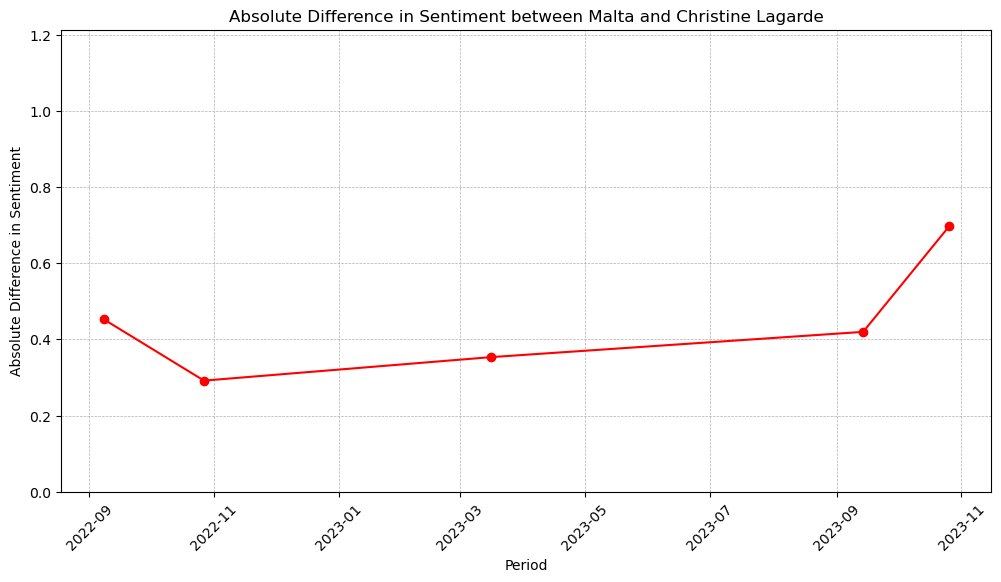

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


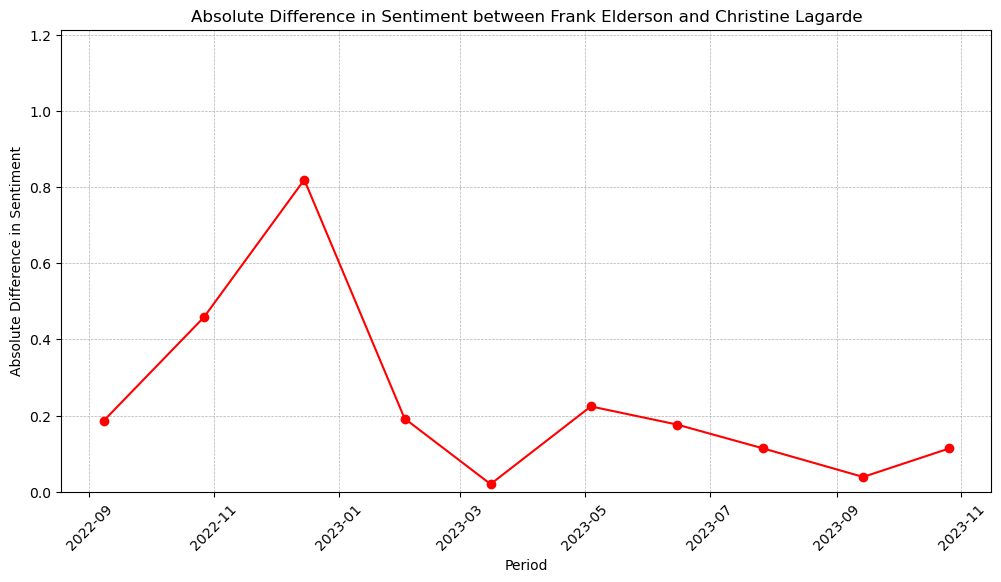

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


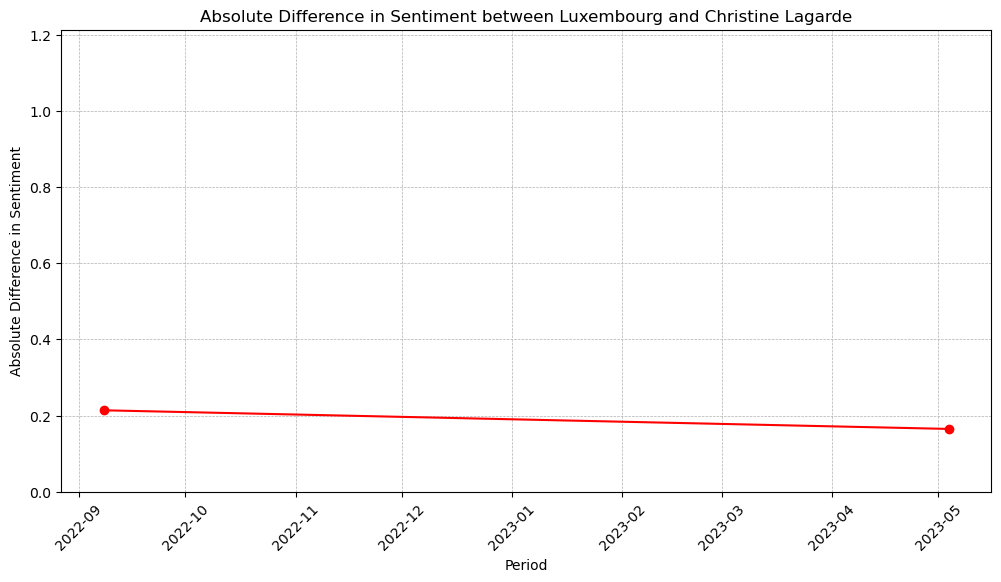

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/310754192.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])


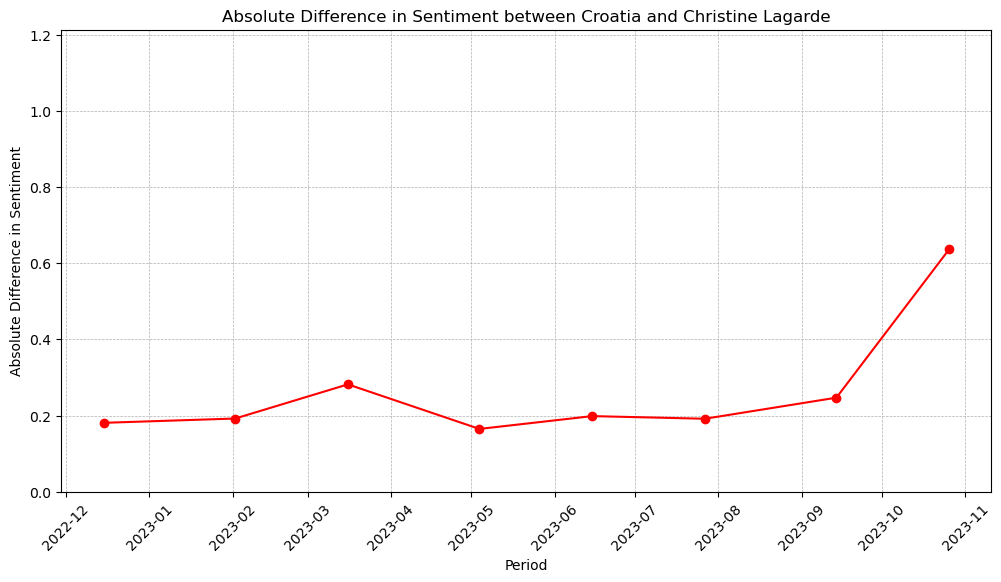

In [495]:
# Get the list of unique countries excluding Christine Lagarde
countries = combined_result_with_lagarde['Country'].unique()
countries = countries[countries != 'Christine Lagarde']

# Calculate the maximum absolute difference across all countries
max_diff = 0
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    max_diff = max(max_diff, abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment']).max())

# Plot each country's sentiment vs Lagarde's sentiment and the absolute differences
for country in countries:
    country_data = combined_result_with_lagarde[combined_result_with_lagarde['Country'] == country]
    
    # Compute the absolute differences
    country_data['Absolute_Difference'] = abs(country_data['Sentiment'] - country_data['Lagarde_Sentiment'])
    
    # Line plot of absolute differences over time
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Period'], country_data['Absolute_Difference'], marker='o', color='red')
    plt.title(f"Absolute Difference in Sentiment between {country} and Christine Lagarde")
    plt.xlabel("Period")
    plt.ylabel("Absolute Difference in Sentiment")
    plt.ylim(0, max_diff)  # Set the y-axis limit to the maximum difference found
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.show()


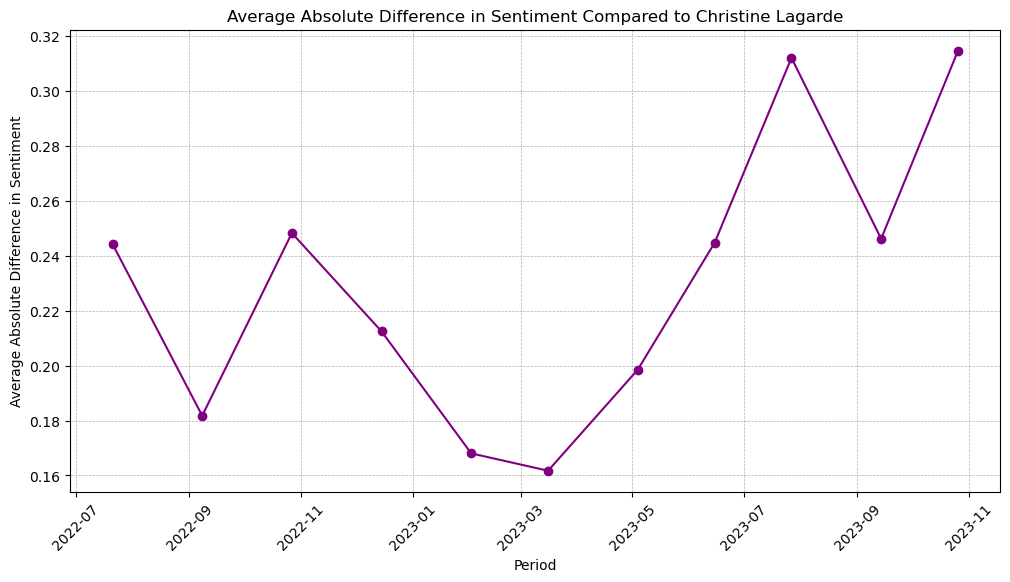

In [496]:
# Ensure the 'Period' column is in datetime format
combined_result_with_lagarde['Period'] = pd.to_datetime(combined_result_with_lagarde['Period'])

# Compute the absolute differences for each country compared to Christine Lagarde
combined_result_with_lagarde['Absolute_Difference'] = abs(combined_result_with_lagarde['Sentiment'] - combined_result_with_lagarde['Lagarde_Sentiment'])

# Calculate the average absolute difference for each period
average_absolute_difference = combined_result_with_lagarde.groupby('Period')['Absolute_Difference'].mean().reset_index()

# Plot the average absolute difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_absolute_difference['Period'], average_absolute_difference['Absolute_Difference'], marker='o', color='purple')
plt.title("Average Absolute Difference in Sentiment Compared to Christine Lagarde")
plt.xlabel("Period")
plt.ylabel("Average Absolute Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/2404705450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_result['Absolute_Difference'] = abs(filtered_combined_result['Sentiment'] - filtered_combined_result['Lagarde_Sentiment'])


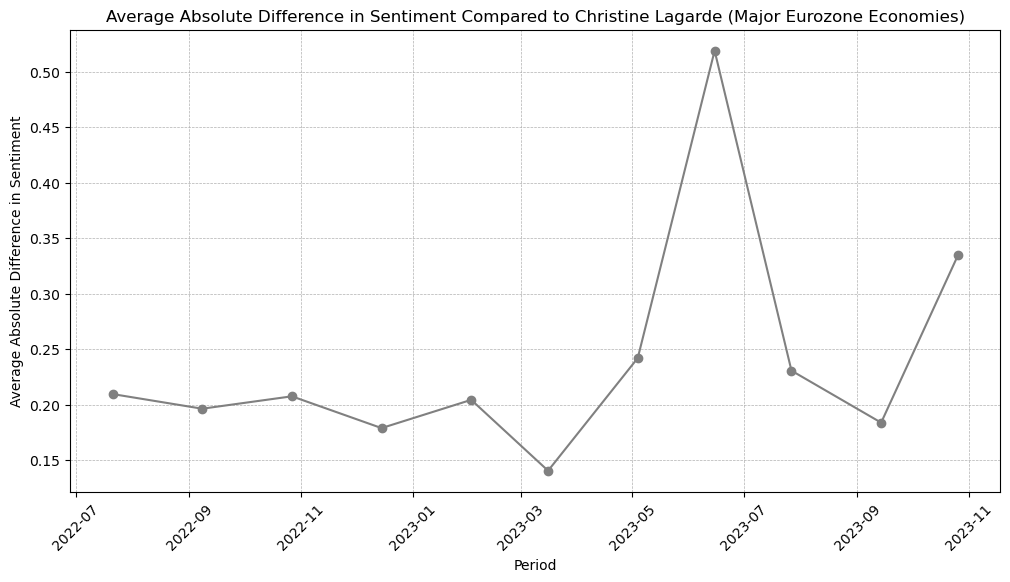

In [497]:
# List of major Eurozone economies
major_economies = ['France', 'Germany', 'Italy', 'Spain', 'Netherlands']

# Filter the DataFrame to include only the major Eurozone economies
filtered_combined_result = combined_result_with_lagarde[combined_result_with_lagarde['Country'].isin(major_economies)]

# Compute the absolute differences for each country compared to Christine Lagarde
filtered_combined_result['Absolute_Difference'] = abs(filtered_combined_result['Sentiment'] - filtered_combined_result['Lagarde_Sentiment'])

# Calculate the average absolute difference for each period
average_absolute_difference = filtered_combined_result.groupby('Period')['Absolute_Difference'].mean().reset_index()

# Plot the average absolute difference in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_absolute_difference['Period'], average_absolute_difference['Absolute_Difference'], marker='o', color='grey')
plt.title("Average Absolute Difference in Sentiment Compared to Christine Lagarde (Major Eurozone Economies)")
plt.xlabel("Period")
plt.ylabel("Average Absolute Difference in Sentiment")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

# Combining results with capital weights

In [498]:
combined_result_with_lagarde

Country              Name_of_Speaker     Period  Sentiment  \
0               Slovenia                Bostjan Vasle 2022-07-21   1.000000   
1      Christine Lagarde            Christine Lagarde 2022-07-21   0.828452   
2          Fabio Panetta                Fabio Panetta 2022-07-21  -0.384615   
3                 France  Francois Villeroy de Galhau 2022-07-21   1.000000   
4    Republic of Ireland             Gabriel Makhlouf 2022-07-21   1.000000   
..                   ...                          ...        ...        ...   
260             Slovakia                Peter Kazimir 2023-10-26   0.285714   
261          Philip Lane                  Philip Lane 2023-10-26   0.543860   
262              Belgium                Pierre Wunsch 2023-10-26   0.641026   
263              Austria              Robert Holzmann 2023-10-26   0.674419   
264               Greece            Yannis Stournaras 2023-10-26   0.240000   

     Lagarde_Sentiment  Discordance  Difference  Absolute_Difference  
0             0.828452     0.171548    0.171548             0.171548  
1             0.828452     0.000000    0.000000             0.000000  
2             0.828452     1.213067   -1.213067             1.213067  
3             0.828452     0.171548    0.171548             0.171548  
4             0.828452     0.171548    0.171548             0.171548  
..                 ...          ...         ...                  ...  
260           0.303125     0.017411   -0.017411             0.017411  
261           0.303125     0.240735    0.240735             0.240735  
262           0.303125     0.337901    0.337901             0.337901  
263           0.303125     0.371294    0.371294             0.371294  
264           0.303125     0.063125   -0.063125             0.063125  

[265 rows x 8 columns]

In [499]:
combined_result_with_lagarde.isnull().sum()

Country                0
Name_of_Speaker        0
Period                 0
Sentiment              0
Lagarde_Sentiment      0
Discordance            0
Difference             0
Absolute_Difference    0
dtype: int64

In [500]:
speakers_to_remove = ["Boris Vujcic", "Edward Scicluna", "Gaston Reinesch"]

# Filter the DataFrame to exclude the listed speakers
df_to_merge = combined_result_with_lagarde[~combined_result_with_lagarde['Name_of_Speaker'].isin(speakers_to_remove)]


In [501]:
import os
os.chdir('/Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony')

current_working_directory = os.getcwd()
print("Current Working Directory:", current_working_directory)


Current Working Directory: /Users/ruimaciel/Desktop/Barcelona/Master_Thesis/ECB_Perceived_Cacophony


In [502]:
capital_key = pd.read_csv(r"./Rui_final_notebooks/capital_key_ecb.csv")
capital_key.columns

Index(['Country', 'Capital Key %', 'Paid-up Capital (€)'], dtype='object')

In [503]:
capital_key.drop(columns=['Paid-up Capital (€)'], inplace=True)

In [504]:
capital_key.rename(columns={'Capital Key %': 'Capital Key'}, inplace=True)

In [505]:
capital_key['Country'] = capital_key['Country'].replace({'The Netherlands': 'Netherlands', 'Ireland': 'Republic of Ireland'})

In [506]:
capital_key

Country  Capital Key
0               Belgium       3.0005
1               Germany      21.7749
2               Estonia       0.2437
3   Republic of Ireland       1.7811
4                Greece       1.8474
5                 Spain       9.6690
6                France      16.3575
7               Croatia       0.6329
8                 Italy      13.0993
9                Cyprus       0.1802
10               Latvia       0.3169
11            Lithuania       0.4826
12           Luxembourg       0.2976
13                Malta       0.1053
14          Netherlands       4.8306
15              Austria       2.4175
16             Portugal       1.9014
17             Slovenia       0.4041
18             Slovakia       0.9403
19              Finland       1.4853

In [507]:
df_merged = df_to_merge.merge(capital_key[['Country', 'Capital Key']], on='Country', how='left')
df_merged

Country              Name_of_Speaker     Period  Sentiment  \
0               Slovenia                Bostjan Vasle 2022-07-21   1.000000   
1      Christine Lagarde            Christine Lagarde 2022-07-21   0.828452   
2          Fabio Panetta                Fabio Panetta 2022-07-21  -0.384615   
3                 France  Francois Villeroy de Galhau 2022-07-21   1.000000   
4    Republic of Ireland             Gabriel Makhlouf 2022-07-21   1.000000   
..                   ...                          ...        ...        ...   
245             Slovakia                Peter Kazimir 2023-10-26   0.285714   
246          Philip Lane                  Philip Lane 2023-10-26   0.543860   
247              Belgium                Pierre Wunsch 2023-10-26   0.641026   
248              Austria              Robert Holzmann 2023-10-26   0.674419   
249               Greece            Yannis Stournaras 2023-10-26   0.240000   

     Lagarde_Sentiment  Discordance  Difference  Absolute_Difference  \
0             0.828452     0.171548    0.171548             0.171548   
1             0.828452     0.000000    0.000000             0.000000   
2             0.828452     1.213067   -1.213067             1.213067   
3             0.828452     0.171548    0.171548             0.171548   
4             0.828452     0.171548    0.171548             0.171548   
..                 ...          ...         ...                  ...   
245           0.303125     0.017411   -0.017411             0.017411   
246           0.303125     0.240735    0.240735             0.240735   
247           0.303125     0.337901    0.337901             0.337901   
248           0.303125     0.371294    0.371294             0.371294   
249           0.303125     0.063125   -0.063125             0.063125   

     Capital Key  
0         0.4041  
1            NaN  
2            NaN  
3        16.3575  
4         1.7811  
..           ...  
245       0.9403  
246          NaN  
247       3.0005  
248       2.4175  
249       1.8474  

[250 rows x 9 columns]

In [508]:
sum_unique_capital_keys = df_merged['Capital Key'].drop_duplicates().sum()

# Display the sum of unique 'Capital Key' values
print(sum_unique_capital_keys)

80.7323


In [509]:
remainder = 100 - sum_unique_capital_keys
value_per_person = remainder / 5
print(value_per_person)

# List of specific speakers to update
speakers_to_update = ["Fabio Panetta", "Philip Lane", "Isabel Schnabel", "Frank Elderson", "Luis de Guindos"]

# Update 'Capital Key' for the specified speakers
df_merged.loc[df_merged['Name_of_Speaker'].isin(speakers_to_update), 'Capital Key'] = value_per_person

# Update 'Capital Key' for the specified speakers
df_merged.loc[df_merged['Name_of_Speaker'].isin(speakers_to_update), 'Capital Key'] = value_per_person


3.853540000000001


In [510]:
# Counting unique entries for each speaker in the column 'Name_of_Speaker'
unique_counts = df_merged['Name_of_Speaker'].value_counts()

# Display the counts
print(unique_counts)

Name_of_Speaker
Bostjan Vasle                  11
Christine Lagarde              11
Yannis Stournaras              11
Robert Holzmann                11
Pierre Wunsch                  11
Philip Lane                    11
Peter Kazimir                  11
Pablo Hernandez de Cos         11
Olli Rehn                      11
Martins Kazaks                 11
Mario Centeno                  11
Madis Muller                   11
Luis de Guindos                11
Klaas Knot                     11
Joachim Nagel                  11
Isabel Schnabel                11
Ignazio Visco                  11
Gediminas Simkus               11
Francois Villeroy de Galhau    11
Fabio Panetta                  11
Gabriel Makhlouf               10
Constantinos Herodotou         10
Frank Elderson                 10
Name: count, dtype: int64


In [511]:
# List of speakers to check
speakers_to_check = ["Gabriel Makhlouf", "Constantinos Herodotou", "Frank Elderson"]

# Find all unique periods in the DataFrame
all_periods = df_merged['Period'].unique()

# Dictionary to hold the missing periods for each speaker
missing_periods = {}

# Check each speaker for missing periods
for speaker in speakers_to_check:
    # Filter the DataFrame for the current speaker and get their unique periods
    speaker_periods = df_merged[df_merged['Name_of_Speaker'] == speaker]['Period'].unique()
    
    # Find the set difference: periods that are missing for the speaker
    missing_periods[speaker] = list(set(all_periods) - set(speaker_periods))

# Output the missing periods for each speaker
for speaker, periods in missing_periods.items():
    print(f"Missing periods for {speaker}: {periods}")

Missing periods for Gabriel Makhlouf: [Timestamp('2023-07-27 00:00:00')]
Missing periods for Constantinos Herodotou: [Timestamp('2022-07-21 00:00:00')]
Missing periods for Frank Elderson: [Timestamp('2022-07-21 00:00:00')]


In [512]:
import pandas as pd
import pandas as pd

# Define the speakers and their missing periods
missing_data = {
    "Gabriel Makhlouf": pd.Timestamp('2023-07-27 00:00:00'),
    "Constantinos Herodotou": pd.Timestamp('2022-07-21 00:00:00'),
    "Frank Elderson": pd.Timestamp('2022-07-21 00:00:00')
}

# Create new rows for each speaker and their missing period
new_rows = []
for speaker, missing_period in missing_data.items():
    # Filter the DataFrame for the current speaker and periods before the missing one
    speaker_df = df_merged[(df_merged['Name_of_Speaker'] == speaker) & (df_merged['Period'] < missing_period)]
    closest_row = None

    # Check if there are entries before the missing period
    if not speaker_df.empty:
        closest_index = (speaker_df['Period'] - missing_period).abs().idxmin()
        closest_row = speaker_df.loc[closest_index]
    else:
        # If no earlier periods exist, look for the next closest period after the missing one
        speaker_df = df_merged[(df_merged['Name_of_Speaker'] == speaker) & (df_merged['Period'] > missing_period)]
        if not speaker_df.empty:
            closest_index = (speaker_df['Period'] - missing_period).abs().idxmin()
            closest_row = speaker_df.loc[closest_index]
        else:
            print(f"No periods found for {speaker}")

    if closest_row is not None:
        # Copy the closest row and modify it
        base_row = closest_row.copy()
        base_row['Period'] = missing_period

        # Append the modified row to new_rows list
        new_rows.append(base_row)

# Convert new_rows list to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append these new rows to the original DataFrame
df_merged = pd.concat([df_merged, new_rows_df], ignore_index=True)

# Verify by displaying the newly added rows
print(df_merged.tail(len(new_rows)))  # Show the last few rows to verify new entries



                 Country         Name_of_Speaker     Period  Sentiment  \
250  Republic of Ireland        Gabriel Makhlouf 2023-07-27   0.500000   
251               Cyprus  Constantinos Herodotou 2022-07-21   0.714286   
252       Frank Elderson          Frank Elderson 2022-07-21   0.600000   

     Lagarde_Sentiment  Discordance  Difference  Absolute_Difference  \
250           0.801483     0.301483   -0.301483             0.301483   
251           0.786194     0.071908   -0.071908             0.071908   
252           0.786194     0.186194   -0.186194             0.186194   

     Capital Key  
250      1.78110  
251      0.18020  
252      3.85354  


In [513]:
# Multiply every value in the 'Capital Key' column by 0.01
df_merged['Capital Key'] = df_merged['Capital Key'] * 0.01

# Display the updated DataFrame to verify the changes
print(df_merged[['Name_of_Speaker', 'Capital Key']].head())  # Show the first few rows as a sample

               Name_of_Speaker  Capital Key
0                Bostjan Vasle     0.004041
1            Christine Lagarde          NaN
2                Fabio Panetta     0.038535
3  Francois Villeroy de Galhau     0.163575
4             Gabriel Makhlouf     0.017811


In [514]:
df_merged

Country              Name_of_Speaker     Period  Sentiment  \
0               Slovenia                Bostjan Vasle 2022-07-21   1.000000   
1      Christine Lagarde            Christine Lagarde 2022-07-21   0.828452   
2          Fabio Panetta                Fabio Panetta 2022-07-21  -0.384615   
3                 France  Francois Villeroy de Galhau 2022-07-21   1.000000   
4    Republic of Ireland             Gabriel Makhlouf 2022-07-21   1.000000   
..                   ...                          ...        ...        ...   
248              Austria              Robert Holzmann 2023-10-26   0.674419   
249               Greece            Yannis Stournaras 2023-10-26   0.240000   
250  Republic of Ireland             Gabriel Makhlouf 2023-07-27   0.500000   
251               Cyprus       Constantinos Herodotou 2022-07-21   0.714286   
252       Frank Elderson               Frank Elderson 2022-07-21   0.600000   

     Lagarde_Sentiment  Discordance  Difference  Absolute_Difference  \
0             0.828452     0.171548    0.171548             0.171548   
1             0.828452     0.000000    0.000000             0.000000   
2             0.828452     1.213067   -1.213067             1.213067   
3             0.828452     0.171548    0.171548             0.171548   
4             0.828452     0.171548    0.171548             0.171548   
..                 ...          ...         ...                  ...   
248           0.303125     0.371294    0.371294             0.371294   
249           0.303125     0.063125   -0.063125             0.063125   
250           0.801483     0.301483   -0.301483             0.301483   
251           0.786194     0.071908   -0.071908             0.071908   
252           0.786194     0.186194   -0.186194             0.186194   

     Capital Key  
0       0.004041  
1            NaN  
2       0.038535  
3       0.163575  
4       0.017811  
..           ...  
248     0.024175  
249     0.018474  
250     0.017811  
251     0.001802  
252     0.038535  

[253 rows x 9 columns]

# Going for index

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/3899863501.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_averages = df_filtered.groupby('Period').apply(weighted_average)


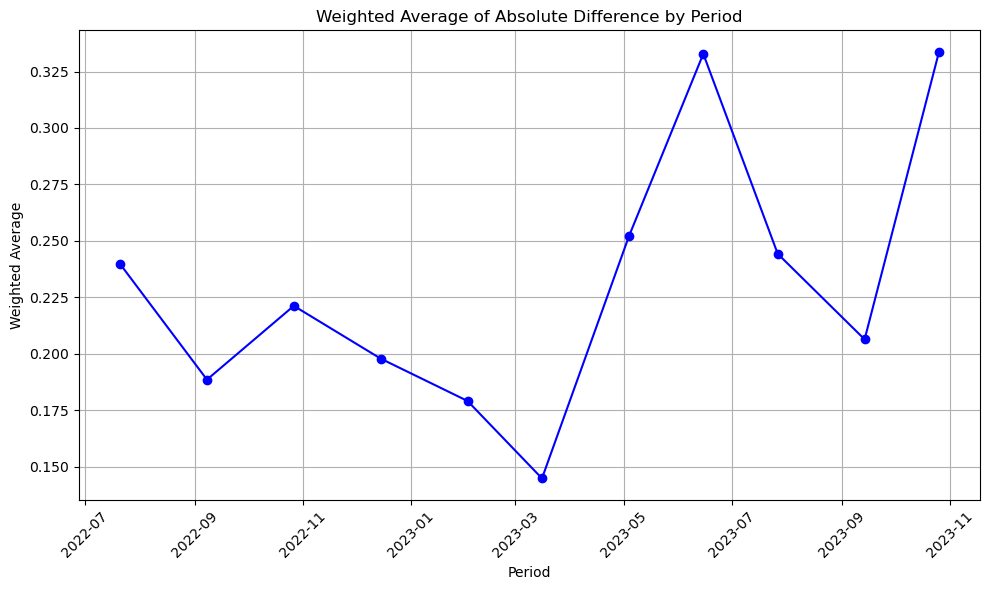

In [516]:
df_filtered = df_merged.dropna(subset=['Capital Key'])

# Define a function to calculate the weighted average for a group
def weighted_average(group):
    if group['Capital Key'].sum() > 0:
        return (group['Absolute_Difference'] * group['Capital Key']).sum() / group['Capital Key'].sum()
    else:
        return None  # Handle cases where the sum of weights is zero

# Calculate the weighted average of 'Absolute_Difference' by 'Period' using 'Capital Key' as weights
weighted_averages = df_filtered.groupby('Period').apply(weighted_average)

# Plot the weighted averages
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(weighted_averages.index, weighted_averages, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('Weighted Average of Absolute Difference by Period')  # Title of the plot
plt.xlabel('Period')  # X-axis label
plt.ylabel('Weighted Average')  # Y-axis label
plt.grid(True)  # Enable grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Display the plot

/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/56687808.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_averages_abs_diff = df_filtered.groupby('Period').apply(weighted_average_abs_diff)
/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/56687808.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_averages_diff = df_filtered.groupby('Period').apply(wei

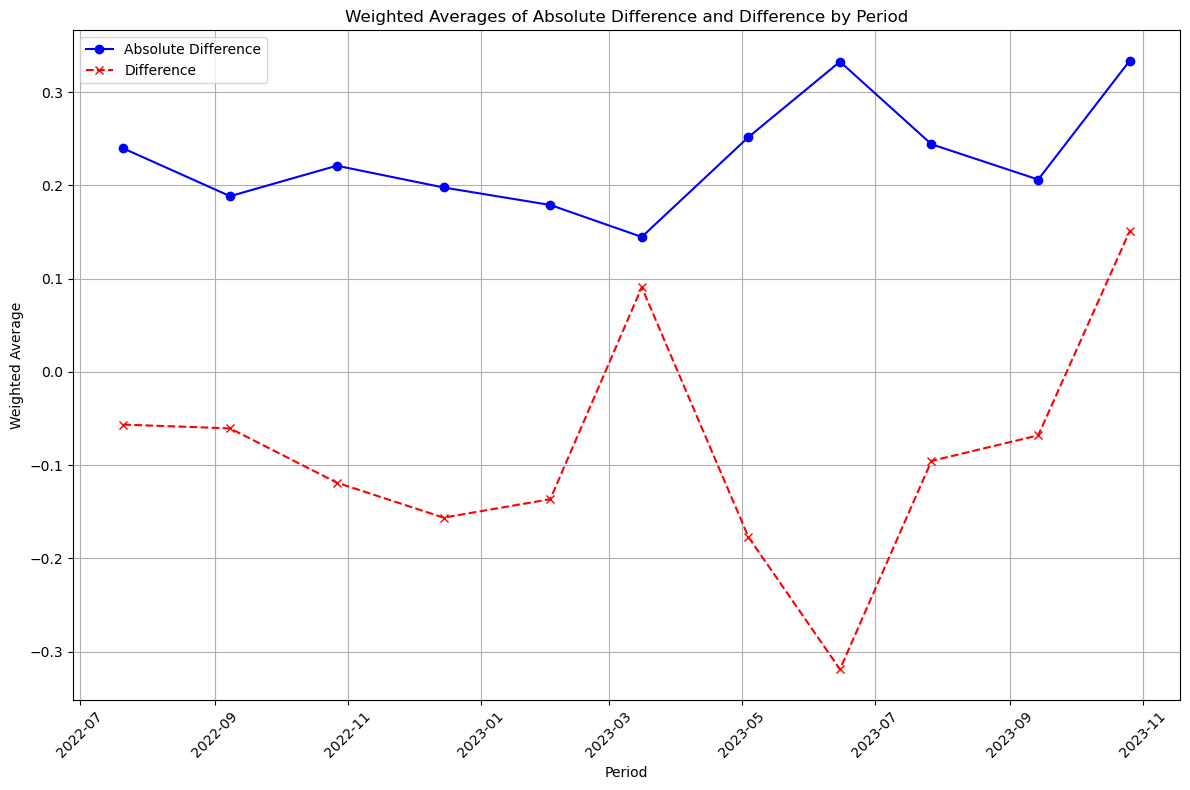

In [529]:
# Exclude rows where 'Capital Key' is NaN
df_filtered = df_merged.dropna(subset=['Capital Key'])

# Define a function to calculate the weighted average for 'Absolute_Difference'
def weighted_average_abs_diff(group):
    if group['Capital Key'].sum() > 0:
        return (group['Absolute_Difference'] * group['Capital Key']).sum() / group['Capital Key'].sum()
    else:
        return None  # Handle cases where the sum of weights is zero

# Calculate the weighted average of 'Absolute_Difference' by 'Period' using 'Capital Key' as weights
weighted_averages_abs_diff = df_filtered.groupby('Period').apply(weighted_average_abs_diff)

# Define a function to calculate the weighted average for 'Difference'
def weighted_average_diff(group):
    if group['Capital Key'].sum() > 0:
        return (group['Difference'] * group['Capital Key']).sum() / group['Capital Key'].sum()
    else:
        return None  # Handle cases where the sum of weights is zero

# Calculate the weighted average of 'Difference' by 'Period' using 'Capital Key' as weights
weighted_averages_diff = df_filtered.groupby('Period').apply(weighted_average_diff)

# Plot the weighted averages on the same graph
plt.figure(figsize=(12, 8))  # Set the figure size
plt.plot(weighted_averages_abs_diff.index, weighted_averages_abs_diff, marker='o', linestyle='-', color='b', label='Absolute Difference')  # Line plot with markers for Absolute Difference
plt.plot(weighted_averages_diff.index, weighted_averages_diff, marker='x', linestyle='--', color='r', label='Difference')  # Line plot with markers for Difference
plt.title('Weighted Averages of Absolute Difference and Difference by Period')  # Title of the plot
plt.xlabel('Period')  # X-axis label
plt.ylabel('Weighted Average')  # Y-axis label
plt.grid(True)  # Enable grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()  # Add a legend to distinguish the lines
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Display the plot



In [546]:
import pandas as pd
import numpy as np

# Assuming df_merged is already defined and contains your data
# Convert 'Period' to date-only format if it includes time
df_merged['Period'] = pd.to_datetime(df_merged['Period']).dt.date

# Create a pivot table with countries on rows and periods as columns for 'Absolute_Difference'
pivot_table_ad = df_merged.pivot_table(index='Country', columns='Period', values='Absolute_Difference', aggfunc='mean')

# Since 'Capital Key' should be constant for each country, take the first non-null value for each country
capital_keys = df_merged.dropna(subset=['Capital Key']).groupby('Country')['Capital Key'].first()

# Join the 'Capital Key' to the pivot table
final_matrix = pivot_table_ad.join(capital_keys)

# Calculate the weighted index across all countries for each period
weighted_index = df_merged.dropna(subset=['Capital Key']).groupby('Period').apply(lambda x: (x['Absolute_Difference'] * x['Capital Key']).sum() / x['Capital Key'].sum())

# Expand weighted_index into a DataFrame to match the structure of final_matrix
# This will add 'Weighted Index' directly as a row into the DataFrame
weighted_index_df = pd.DataFrame(weighted_index).T  # Transpose to make it a row
weighted_index_df.index = ['Weighted Index']  # Name the index
weighted_index_df['Capital Key'] = None  # Add the 'Capital Key' column with None as value

# Concatenate weighted_index_df at the bottom of final_matrix
final_matrix = pd.concat([final_matrix, weighted_index_df])

# Drop 'Christine Lagarde' if present in the Country index
if 'Christine Lagarde' in final_matrix.index:
    final_matrix = final_matrix.drop('Christine Lagarde', axis=0)

# Print and display results
print("Pivot Table of Absolute Differences:")
final_matrix


Pivot Table of Absolute Differences:


/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/3585553369.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_index = df_merged.dropna(subset=['Capital Key']).groupby('Period').apply(lambda x: (x['Absolute_Difference'] * x['Capital Key']).sum() / x['Capital Key'].sum())
/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/3585553369.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_matrix = pd.concat([f

2022-07-21  2022-09-08  2022-10-27  2022-12-15  \
Austria                0.063746    0.213806    0.083398    0.104810   
Belgium                0.171548    0.213806    0.291732    0.485762   
Cyprus                 0.071908    0.071908    0.169807    0.152429   
Estonia                0.171548    0.213806    0.291732    0.819095   
Fabio Panetta          1.213067    0.066438    0.482916    0.123443   
Finland                0.171548    0.247732    0.291732    0.180905   
France                 0.171548    0.031477    0.141104    0.182732   
Frank Elderson         0.186194    0.186194    0.458268    0.819095   
Germany                0.104881    0.180473    0.125065    0.020905   
Greece                 0.828452    0.186194    0.708268    0.242172   
Isabel Schnabel        0.001785    0.057556    0.041732    0.047356   
Italy                  0.428452    0.504142    0.261840    0.596873   
Latvia                 0.023400    0.142378    0.169807    0.069793   
Lithuania              0.171548    0.000479    0.291732    0.194095   
Luis de Guindos        0.384007    0.127464    0.310078    0.009476   
Netherlands            0.171548    0.092594    0.127623    0.043650   
Philip Lane            0.038215    0.186194    0.001372    0.091619   
Portugal               0.328452    0.196450    0.383944    0.280634   
Republic of Ireland    0.171548    0.357622    0.069509    0.041318   
Slovakia               0.171548    0.213806    0.291732    0.180905   
Slovenia               0.171548    0.213806    0.291732    0.180905   
Spain                  0.171548    0.173290    0.382181    0.050470   
Weighted Index         0.239755    0.188541    0.221221    0.197861   

                     2023-02-02  2023-03-16  2023-05-04  2023-06-15  \
Austria                0.046357    0.035134    0.390683    0.198517   
Belgium                0.044042    0.313316    0.022015    0.528756   
Cyprus                 0.207810    0.171497    0.085127    0.051483   
Estonia                0.057810    0.019982    0.164873    0.087198   
Fabio Panetta          0.492020    0.125245    0.328278    0.086206   
Finland                0.016143    0.059198    0.164873    0.121594   
France                 0.160751    0.056286    0.429722    0.449211   
Frank Elderson         0.192190    0.019982    0.224016    0.176483   
Germany                0.007810    0.248052    0.124056    0.098585   
Greece                 0.281494    0.284982    0.553877    0.461058   
Isabel Schnabel        0.047363    0.174070    0.197196    0.046381   
Italy                  0.445172    0.103474    0.428877    0.704261   
Latvia                 0.262355    0.195421    0.007541    0.023706   
Lithuania              0.016143    0.202240    0.057350    0.201483   
Luis de Guindos        0.030032    0.123429    0.203157    0.126045   
Netherlands            0.049333    0.245208    0.095105    1.041483   
Philip Lane            0.031351    0.205636    0.276686    0.065634   
Portugal               0.517487    0.128166    0.323500    0.437847   
Republic of Ireland    0.192190    0.171497    0.094387    0.301483   
Slovakia               0.192190    0.122546    0.164873    0.031850   
Slovenia               0.192190    0.353316    0.164873    0.134817   
Spain                  0.358830    0.049518    0.132425    0.301483   
Weighted Index         0.179098    0.144811    0.251947    0.332837   

                     2023-07-27  2023-09-14  2023-10-26  Capital Key  
Austria                0.386063    0.115385    0.371294     0.024175  
Belgium                0.441618    0.639091    0.337901     0.030005  
Cyprus                 0.891715    0.174018    0.696875     0.001802  
Estonia                0.441618    0.469156    0.636458     0.002437  
Fabio Panetta          0.127009    0.270796    0.004567     0.038535  
Finland                0.441618    0.419732    0.303125     0.014853  
France                 0.088685    0.292224    0.366117     0.163575  
Frank Elderson         0.113937    0.038780

In [551]:
import statsmodels.api as sm

# Prepare Y (dependent variable)
Y = final_matrix.loc['Weighted Index'].dropna()  # Drop any NaN values in the Weighted Index row

# Prepare X (independent variables)
# Exclude the 'Weighted Index' row from X
X = final_matrix.drop('Weighted Index', axis=0)

# Add a constant to the model (necessary for OLS to have an intercept)
X = sm.add_constant(X)


In [552]:
X

const  2022-07-21  2022-09-08  2022-10-27  2022-12-15  \
Austria                1.0    0.063746    0.213806    0.083398    0.104810   
Belgium                1.0    0.171548    0.213806    0.291732    0.485762   
Cyprus                 1.0    0.071908    0.071908    0.169807    0.152429   
Estonia                1.0    0.171548    0.213806    0.291732    0.819095   
Fabio Panetta          1.0    1.213067    0.066438    0.482916    0.123443   
Finland                1.0    0.171548    0.247732    0.291732    0.180905   
France                 1.0    0.171548    0.031477    0.141104    0.182732   
Frank Elderson         1.0    0.186194    0.186194    0.458268    0.819095   
Germany                1.0    0.104881    0.180473    0.125065    0.020905   
Greece                 1.0    0.828452    0.186194    0.708268    0.242172   
Isabel Schnabel        1.0    0.001785    0.057556    0.041732    0.047356   
Italy                  1.0    0.428452    0.504142    0.261840    0.596873   
Latvia                 1.0    0.023400    0.142378    0.169807    0.069793   
Lithuania              1.0    0.171548    0.000479    0.291732    0.194095   
Luis de Guindos        1.0    0.384007    0.127464    0.310078    0.009476   
Netherlands            1.0    0.171548    0.092594    0.127623    0.043650   
Philip Lane            1.0    0.038215    0.186194    0.001372    0.091619   
Portugal               1.0    0.328452    0.196450    0.383944    0.280634   
Republic of Ireland    1.0    0.171548    0.357622    0.069509    0.041318   
Slovakia               1.0    0.171548    0.213806    0.291732    0.180905   
Slovenia               1.0    0.171548    0.213806    0.291732    0.180905   
Spain                  1.0    0.171548    0.173290    0.382181    0.050470   

                     2023-02-02  2023-03-16  2023-05-04  2023-06-15  \
Austria                0.046357    0.035134    0.390683    0.198517   
Belgium                0.044042    0.313316    0.022015    0.528756   
Cyprus                 0.207810    0.171497    0.085127    0.051483   
Estonia                0.057810    0.019982    0.164873    0.087198   
Fabio Panetta          0.492020    0.125245    0.328278    0.086206   
Finland                0.016143    0.059198    0.164873    0.121594   
France                 0.160751    0.056286    0.429722    0.449211   
Frank Elderson         0.192190    0.019982    0.224016    0.176483   
Germany                0.007810    0.248052    0.124056    0.098585   
Greece                 0.281494    0.284982    0.553877    0.461058   
Isabel Schnabel        0.047363    0.174070    0.197196    0.046381   
Italy                  0.445172    0.103474    0.428877    0.704261   
Latvia                 0.262355    0.195421    0.007541    0.023706   
Lithuania              0.016143    0.202240    0.057350    0.201483   
Luis de Guindos        0.030032    0.123429    0.203157    0.126045   
Netherlands            0.049333    0.245208    0.095105    1.041483   
Philip Lane            0.031351    0.205636    0.276686    0.065634   
Portugal               0.517487    0.128166    0.323500    0.437847   
Republic of Ireland    0.192190    0.171497    0.094387    0.301483   
Slovakia               0.192190    0.122546    0.164873    0.031850   
Slovenia               0.192190    0.353316    0.164873    0.134817   
Spain                  0.358830    0.049518    0.132425    0.301483   

                     2023-07-27  2023-09-14  2023-10-26  
Austria                0.386063    0.115385    0.371294  
Belgium                0.441618    0.639091    0.337901  
Cyprus                 0.891715    0.174018    0.696875  
Estonia                0.441618    0.469156    0.636458  
Fabio Panetta          0.127009    0.270796    0.004567  
Finland                0.441618    0.419732    0.303125  
France                 0.088685    0.292224    0.366117  
Frank Elderson         0.113937    0.038780    0.113542  
Germany                0.160368    0.147888    0.403462  
Greece      

In [553]:

# Check and ensure alignment by dropping any columns from X that aren't in Y due to the dropna operation
X = X[Y.index]
X

2022-07-21  2022-09-08  2022-10-27  2022-12-15  \
Austria                0.063746    0.213806    0.083398    0.104810   
Belgium                0.171548    0.213806    0.291732    0.485762   
Cyprus                 0.071908    0.071908    0.169807    0.152429   
Estonia                0.171548    0.213806    0.291732    0.819095   
Fabio Panetta          1.213067    0.066438    0.482916    0.123443   
Finland                0.171548    0.247732    0.291732    0.180905   
France                 0.171548    0.031477    0.141104    0.182732   
Frank Elderson         0.186194    0.186194    0.458268    0.819095   
Germany                0.104881    0.180473    0.125065    0.020905   
Greece                 0.828452    0.186194    0.708268    0.242172   
Isabel Schnabel        0.001785    0.057556    0.041732    0.047356   
Italy                  0.428452    0.504142    0.261840    0.596873   
Latvia                 0.023400    0.142378    0.169807    0.069793   
Lithuania              0.171548    0.000479    0.291732    0.194095   
Luis de Guindos        0.384007    0.127464    0.310078    0.009476   
Netherlands            0.171548    0.092594    0.127623    0.043650   
Philip Lane            0.038215    0.186194    0.001372    0.091619   
Portugal               0.328452    0.196450    0.383944    0.280634   
Republic of Ireland    0.171548    0.357622    0.069509    0.041318   
Slovakia               0.171548    0.213806    0.291732    0.180905   
Slovenia               0.171548    0.213806    0.291732    0.180905   
Spain                  0.171548    0.173290    0.382181    0.050470   

                     2023-02-02  2023-03-16  2023-05-04  2023-06-15  \
Austria                0.046357    0.035134    0.390683    0.198517   
Belgium                0.044042    0.313316    0.022015    0.528756   
Cyprus                 0.207810    0.171497    0.085127    0.051483   
Estonia                0.057810    0.019982    0.164873    0.087198   
Fabio Panetta          0.492020    0.125245    0.328278    0.086206   
Finland                0.016143    0.059198    0.164873    0.121594   
France                 0.160751    0.056286    0.429722    0.449211   
Frank Elderson         0.192190    0.019982    0.224016    0.176483   
Germany                0.007810    0.248052    0.124056    0.098585   
Greece                 0.281494    0.284982    0.553877    0.461058   
Isabel Schnabel        0.047363    0.174070    0.197196    0.046381   
Italy                  0.445172    0.103474    0.428877    0.704261   
Latvia                 0.262355    0.195421    0.007541    0.023706   
Lithuania              0.016143    0.202240    0.057350    0.201483   
Luis de Guindos        0.030032    0.123429    0.203157    0.126045   
Netherlands            0.049333    0.245208    0.095105    1.041483   
Philip Lane            0.031351    0.205636    0.276686    0.065634   
Portugal               0.517487    0.128166    0.323500    0.437847   
Republic of Ireland    0.192190    0.171497    0.094387    0.301483   
Slovakia               0.192190    0.122546    0.164873    0.031850   
Slovenia               0.192190    0.353316    0.164873    0.134817   
Spain                  0.358830    0.049518    0.132425    0.301483   

                     2023-07-27  2023-09-14  2023-10-26  
Austria                0.386063    0.115385    0.371294  
Belgium                0.441618    0.639091    0.337901  
Cyprus                 0.891715    0.174018    0.696875  
Estonia                0.441618    0.469156    0.636458  
Fabio Panetta          0.127009    0.270796    0.004567  
Finland                0.441618    0.419732    0.303125  
France                 0.088685    0.292224    0.366117  
Frank Elderson         0.113937    0.038780    0.113542  
Germany                0.160368    0.147888    0.403462  
Greece                 0.499558    0.556738    0.063125  
Isabel Schnabel        0.046754    0.059077    0.617261  
Italy                  0.558382    0.238804    0.554018  

In [554]:
# Perform the regression using Ordinary Least Squares (OLS)
model = sm.OLS(Y, X.T).fit()  # Transpose X to match the dimensionality of Y

# Print out the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Weighted Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 25 Jun 2024   Prob (F-statistic):                nan
Time:                        21:13:46   Log-Likelihood:                 380.87
No. Observations:                  11   AIC:                            -739.7
Df Residuals:                       0   BIC:                            -735.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Austria                 0.0654    

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [555]:
import pandas as pd
import numpy as np

# Assuming df_merged is already defined and contains your data
# Convert 'Period' to date-only format if it includes time
df_merged['Period'] = pd.to_datetime(df_merged['Period']).dt.date

# Create a pivot table with countries on rows and periods as columns for 'Absolute_Difference'
pivot_table_ad = df_merged.pivot_table(index='Country', columns='Period', values='Difference', aggfunc='mean')

# Since 'Capital Key' should be constant for each country, take the first non-null value for each country
capital_keys = df_merged.dropna(subset=['Capital Key']).groupby('Country')['Capital Key'].first()

# Join the 'Capital Key' to the pivot table
final_matrix = pivot_table_ad.join(capital_keys)

# Calculate the weighted index across all countries for each period
weighted_index = df_merged.dropna(subset=['Capital Key']).groupby('Period').apply(lambda x: (x['Difference'] * x['Capital Key']).sum() / x['Capital Key'].sum())

# Expand weighted_index into a DataFrame to match the structure of final_matrix
# This will add 'Weighted Index' directly as a row into the DataFrame
weighted_index_df = pd.DataFrame(weighted_index).T  # Transpose to make it a row
weighted_index_df.index = ['Weighted Index']  # Name the index
weighted_index_df['Capital Key'] = None  # Add the 'Capital Key' column with None as value

# Concatenate weighted_index_df at the bottom of final_matrix
final_matrix = pd.concat([final_matrix, weighted_index_df])

# Drop 'Christine Lagarde' if present in the Country index
if 'Christine Lagarde' in final_matrix.index:
    final_matrix = final_matrix.drop('Christine Lagarde', axis=0)

# Print and display results
print("Pivot Table of Absolute Differences:")
final_matrix

Pivot Table of Absolute Differences:


/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/4072885063.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_index = df_merged.dropna(subset=['Capital Key']).groupby('Period').apply(lambda x: (x['Difference'] * x['Capital Key']).sum() / x['Capital Key'].sum())
/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_23407/4072885063.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_matrix = pd.concat([final_matr

2022-07-21  2022-09-08  2022-10-27  2022-12-15  \
Austria               -0.063746    0.213806    0.083398   -0.104810   
Belgium                0.171548    0.213806    0.291732   -0.485762   
Cyprus                -0.071908   -0.071908   -0.169807   -0.152429   
Estonia                0.171548    0.213806    0.291732   -0.819095   
Fabio Panetta         -1.213067    0.066438   -0.482916   -0.123443   
Finland                0.171548   -0.247732    0.291732    0.180905   
France                 0.171548   -0.031477   -0.141104   -0.182732   
Frank Elderson        -0.186194   -0.186194   -0.458268   -0.819095   
Germany                0.104881    0.180473    0.125065    0.020905   
Greece                -0.828452   -0.186194   -0.708268   -0.242172   
Isabel Schnabel       -0.001785    0.057556    0.041732   -0.047356   
Italy                 -0.428452   -0.504142   -0.261840   -0.596873   
Latvia                 0.023400    0.142378   -0.169807    0.069793   
Lithuania              0.171548   -0.000479    0.291732   -0.194095   
Luis de Guindos       -0.384007   -0.127464   -0.310078    0.009476   
Netherlands            0.171548    0.092594   -0.127623    0.043650   
Philip Lane            0.038215   -0.186194   -0.001372    0.091619   
Portugal              -0.328452   -0.196450   -0.383944   -0.280634   
Republic of Ireland    0.171548   -0.357622    0.069509   -0.041318   
Slovakia               0.171548    0.213806    0.291732    0.180905   
Slovenia               0.171548    0.213806    0.291732    0.180905   
Spain                  0.171548   -0.173290   -0.382181    0.050470   
Weighted Index        -0.056510   -0.060582   -0.118776   -0.156309   

                     2023-02-02  2023-03-16  2023-05-04  2023-06-15  \
Austria                0.046357    0.035134   -0.390683    0.198517   
Belgium                0.044042    0.313316    0.022015   -0.528756   
Cyprus                -0.207810    0.171497   -0.085127   -0.051483   
Estonia               -0.057810    0.019982    0.164873   -0.087198   
Fabio Panetta         -0.492020    0.125245   -0.328278   -0.086206   
Finland               -0.016143    0.059198    0.164873    0.121594   
France                -0.160751    0.056286   -0.429722   -0.449211   
Frank Elderson         0.192190    0.019982   -0.224016   -0.176483   
Germany               -0.007810    0.248052    0.124056   -0.098585   
Greece                -0.281494   -0.284982   -0.553877   -0.461058   
Isabel Schnabel        0.047363    0.174070   -0.197196   -0.046381   
Italy                 -0.445172   -0.103474   -0.428877   -0.704261   
Latvia                -0.262355    0.195421   -0.007541   -0.023706   
Lithuania             -0.016143   -0.202240   -0.057350   -0.201483   
Luis de Guindos       -0.030032   -0.123429   -0.203157   -0.126045   
Netherlands            0.049333    0.245208    0.095105   -1.041483   
Philip Lane            0.031351    0.205636   -0.276686   -0.065634   
Portugal              -0.517487   -0.128166   -0.323500   -0.437847   
Republic of Ireland    0.192190    0.171497   -0.094387   -0.301483   
Slovakia               0.192190    0.122546    0.164873    0.031850   
Slovenia               0.192190    0.353316    0.164873   -0.134817   
Spain                 -0.358830    0.049518   -0.132425   -0.301483   
Weighted Index        -0.136555    0.090834   -0.177277   -0.319027   

                     2023-07-27  2023-09-14  2023-10-26  Capital Key  
Austria                0.386063    0.115385    0.371294     0.024175  
Belgium                0.441618   -0.639091    0.337901     0.030005  
Cyprus                -0.891715   -0.174018    0.696875     0.001802  
Estonia                0.441618   -0.469156   -0.636458     0.002437  
Fabio Panetta         -0.127009    0.270796    0.004567     0.038535  
Finland                0.441618    0.419732   -0.303125     0.014853  
France                -0.088685   -0.292224   -0.366117     0.163575  
Frank Elderson        -0.113937    0.038780